# Análise de Cidades para Abertura de Clínicas de Fisioterapia no Brasil

# Objetivo
Este projeto de ciência de dados tem como objetivo analisar cidades no Brasil e identificar aquelas que indicam melhores oportunidades para a abertura de clínicas de fisioterapia. Por meio dessa análise, busca-se fornecer informações para orientar a abertura ou expansão de clínicas de fisioterapia em regiões que apresentem maior necessidade ou oportunidade desses serviços.

## Contexto e relevância
O contexto da análise engloba todos os municípios do Brasil, embora dados sobre todos os municípios não foram encontrados para todas as variáveis. A relevância da escolha pode ser explicada pelos seguintes pontos:

- **Impacto na saúde pública:** A fisioterapia desempenha um papel crucial na reabilitação e tratamento de lesões e condições físicas. Ao identificar as cidades que podem se beneficiar da abertura de mais clínicas de fisioterapia, contribui-se para melhorar a saúde pública nessas áreas, proporcionando acesso adequado a serviços de reabilitação.

- **Oportunidades de negócios:** Ao determinar as cidades com demanda insuficiente ou subatendida de clínicas de fisioterapia, empresários e investidores podem identificar oportunidades de negócios. Isso pode incentivar a abertura de novas clínicas e promover o empreendedorismo nessa área específica da saúde.

- **Planejamento de recursos de saúde:** Ao analisar os dados e identificar as cidades que precisam de mais clínicas de fisioterapia, espera-se obter informações valiosas para o planejamento estratégico de recursos de saúde.

- **Melhoria na qualidade de vida:** A disponibilidade de serviços de fisioterapia adequados em uma comunidade pode contribuir para melhorar a qualidade de vida dos seus moradores.

# Primeira parte do projeto

A primeira parte do projeto utiliza técnicas de coleta de dados, pré-processamento e análise exploratória para alcançar os objetivos propostos.

## Coleta e pré-processamento dos dados

Antes de realizar a análise, os dados coletados passaram por um processo de pré-processamento para garantir sua qualidade e consistência. Nessa etapa, foram tratados valores ausentes, removidos duplicatas e os dados foram transformados em um formato adequado para análise. Foram realizadas manipulações e engenharia de recursos, bem como normalização dos dados, quando necessário.

Os dados foram coletados dos seguintes sites:
* Ministério da Saúde (TABNET):
Disponivel em: https://datasus.saude.gov.br/informacoes-de-saude-tabnet/

* Ministério da Fazenda:
Disponivel em: https://dados.gov.br/dados/conjuntos-dados/cadastro-nacional-da-pessoa-juridica---cnpj

* Agência Nacional de Saúde Suplementar:
Disponivel em: https://www.ans.gov.br/perfil-do-setor/dados-gerais

* IBGE https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html

## Análise exploratória

Após a organização dos dados, com o dataframe DSP_data, diversos passos de análise exploratória foram realizados.

## Dicionário de dados

| Nome da Variável        | Descrição                                                  | Tipo         |
|-------------------------|------------------------------------------------------------|--------------|
| Nome                    | Nome do município                                          | Texto        |
| Codigo                  | Código do município                                        | Numérico     |
| 20 a 29 anos            | Número de pessoas na faixa etária de 20 a 29 anos          | Numérico     |
| 30 a 39 anos            | Número de pessoas na faixa etária de 30 a 39 anos          | Numérico     |
| 40 a 49 anos            | Número de pessoas na faixa etária de 40 a 49 anos          | Numérico     |
| 50 a 59 anos            | Número de pessoas na faixa etária de 50 a 59 anos          | Numérico     |
| 60 a 69 anos            | Número de pessoas na faixa etária de 60 a 69 anos          | Numérico     |
| 70 a 79 anos            | Número de pessoas na faixa etária de 70 a 79 anos          | Numérico     |
| 80 anos e mais          | Número de pessoas com 80 anos ou mais                      | Numérico     |
| Menor que 1 a 9 anos    | Número de pessoas com idade inferior a 10 anos             | Numérico     |
| 10 a 19 anos            | Número de pessoas na faixa etária de 10 a 19 anos          | Numérico     |
| Total_População         | Total da população do município                            | Numérico     |
| Total_BeneficiariosPlanoSaude | Total de beneficiários de plano de saúde no município   | Numérico     |
| PH_Articulacoes | Número de procedimentos hospitalares relacionados a articulações | Numérico     |
| PH_Ortopedicas  | Número de procedimentos hospitalares relacionados a ortopedia | Numérico     |
| AcidTransito   | Número de acidentes de trânsito no município               | Numérico     |
| PIB/capita   | Pib por capita do município               | Numérico     |
| PIB   | PIB do município               | Numérico     |
| VABServiços   | Valor adicionado bruto de serviços               | Numérico     |

## 1. Importação de bibliotecas

In [3]:
import pandas as pd
import os
!pip install unidecode
!pip install scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
!pip install geopandas
import geopandas as gpd
import requests
import zipfile
import io
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 5.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 79.9 MB/s eta 0:00:00


## 2. Coleta, limpeza e pré-processamento de dados

### 2.1 Inserção dos dados

In [ ]:
# Lista das URLs dos arquivos brutos ('raw') no GitHub
urls = [
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Acidentes_de_transito.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Estabelecimentos.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Municipios.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Populacao_residente.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Procedimentos_hospitalares_ARTICULACOES.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Procedimentos_hospitalares_AVC.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Procedimentos_hospitalares_CONDICOESNAUROLOGICAS.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Procedimentos_hospitalares_DOENCASCRONICAS.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Procedimentos_hospitalares_ORTOPEDICAS.csv',
    'https://raw.githubusercontent.com/FabricioLealRS/potencial_clinicas_fisioterapia/Data/Qtd_beneficiarios_planosdesaude.csv'
]

# Dicionário que vai armazenar os dataframes
dfs = {}

for url in urls:
    # Lê o arquivo CSV
    df = pd.read_csv(url, sep=';')

    # Remove a extensão .csv do nome do arquivo para usar como chave
    chave = os.path.splitext(os.path.basename(url))[0]

    # Armazena o dataframe no dicionário
    dfs[chave] = df

# Agora você pode acessar cada dataframe através da chave correspondente
# Por exemplo, para ver as primeiras linhas do dataframe 'Acidentes_de_transito', você pode fazer:
print(dfs['Acidentes_de_transito'].head(10))



<ipython-input-2-43f8669a8e90>:20: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=';')


     Município de ocorrência  Total
0        110040 Alto Paraíso      1
1           110002 Ariquemes      4
2             110045 Buritis      1
3  110080 Candeias do Jamari     24
4             110094 Cujubim      2
5       110010 Guajará-Mirim      5
6     110110 Itapuã do Oeste      5
7                110011 Jaru      1
8           110012 Ji-Paraná      1
9  110013 Machadinho D'Oeste      1


In [ ]:
# Iterar sobre todas as chaves do dicionário dfs
for key, df in dfs.items():
    print(f"DataFrame: {key}")
    for column, dtype in df.dtypes.iteritems():
        print(f"Coluna: {column} | Tipo de dado: {dtype}")
    print("\n")

DataFrame: Acidentes_de_transito
Coluna: Município de ocorrência | Tipo de dado: object
Coluna: Total | Tipo de dado: int64


DataFrame: Estabelecimentos
Coluna: CNPJ BÃƒÂSICO | Tipo de dado: float64
Coluna: CNPJ ORDEM | Tipo de dado: int64
Coluna: CNPJ DV | Tipo de dado: int64
Coluna: IDENTIFICADOR M-F | Tipo de dado: int64
Coluna: NOME FANTASIA | Tipo de dado: object
Coluna: SITUACAO CADASTRAL | Tipo de dado: int64
Coluna: DATA SITUACAO | Tipo de dado: int64
Coluna: MOTIVOSITUACAO | Tipo de dado: int64
Coluna: NOME CIDADE EXTERIOR | Tipo de dado: object
Coluna: PAIS | Tipo de dado: float64
Coluna: DATA INICIO ATIVIDADE | Tipo de dado: int64
Coluna: CNAE PRINCIPAL | Tipo de dado: int64
Coluna: CNAE SECUNDARIO | Tipo de dado: object
Coluna: TIPO LOGRADOURO | Tipo de dado: object
Coluna: LOGRADOURO | Tipo de dado: object
Coluna: NUMERO | Tipo de dado: object
Coluna: COMPLEMENTO | Tipo de dado: object
Coluna: BAIRRO | Tipo de dado: object
Coluna: CEP | Tipo de dado: float64
Coluna: UF |

<ipython-input-3-e54eb124ea49>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in df.dtypes.iteritems():


### 2.2 Ajustando strings

In [ ]:
# Iterar sobre todas as chaves do dicionário dfs
for key, df in dfs.items():
    print(f"DataFrame: {key}")

    if key == 'Acidentes_de_transito':
        print("Coluna: Município de ocorrência | Tipo de dado: string")

    elif key in ['Municipios', 'Populacao_residente', 'Procedimentos_hospitalares_ARTICULACOES',
                'Procedimentos_hospitalares_AVC', 'Procedimentos_hospitalares_CONDICOESNAUROLOGICAS',
                'Procedimentos_hospitalares_DOENCASCRONICAS', 'Procedimentos_hospitalares_ORTOPEDICAS',
                'Qtd_beneficiarios_planosdesaude']:
        print(f"Coluna: Municipio | Tipo de dado: string")

    else:
        for column, dtype in df.dtypes.iteritems():
            if dtype == 'object':
                print(f"Coluna: {column} | Tipo de dado: string")
            else:
                print(f"Coluna: {column} | Tipo de dado: {dtype}")

    print("\n")



DataFrame: Acidentes_de_transito
Coluna: Município de ocorrência | Tipo de dado: string


DataFrame: Estabelecimentos
Coluna: CNPJ BÃƒÂSICO | Tipo de dado: float64
Coluna: CNPJ ORDEM | Tipo de dado: int64
Coluna: CNPJ DV | Tipo de dado: int64
Coluna: IDENTIFICADOR M-F | Tipo de dado: int64
Coluna: NOME FANTASIA | Tipo de dado: string
Coluna: SITUACAO CADASTRAL | Tipo de dado: int64
Coluna: DATA SITUACAO | Tipo de dado: int64
Coluna: MOTIVOSITUACAO | Tipo de dado: int64
Coluna: NOME CIDADE EXTERIOR | Tipo de dado: string
Coluna: PAIS | Tipo de dado: float64
Coluna: DATA INICIO ATIVIDADE | Tipo de dado: int64
Coluna: CNAE PRINCIPAL | Tipo de dado: int64
Coluna: CNAE SECUNDARIO | Tipo de dado: string
Coluna: TIPO LOGRADOURO | Tipo de dado: string
Coluna: LOGRADOURO | Tipo de dado: string
Coluna: NUMERO | Tipo de dado: string
Coluna: COMPLEMENTO | Tipo de dado: string
Coluna: BAIRRO | Tipo de dado: string
Coluna: CEP | Tipo de dado: float64
Coluna: UF | Tipo de dado: string
Coluna: MUNICI

<ipython-input-4-2de83104680c>:15: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in df.dtypes.iteritems():


In [ ]:
import unidecode

# Lista dos nomes dos dataframes que foram ajustados para tipo 'string'
df_names_to_adjust = [
    'Municipios',
    'Populacao_residente',
    'Procedimentos_hospitalares_ARTICULACOES',
    'Procedimentos_hospitalares_AVC',
    'Procedimentos_hospitalares_CONDICOESNAUROLOGICAS',
    'Procedimentos_hospitalares_DOENCASCRONICAS',
    'Procedimentos_hospitalares_ORTOPEDICAS',
    'Qtd_beneficiarios_planosdesaude'
]

# Iterar sobre todas as chaves do dicionário dfs
for key, df in dfs.items():
    print(f"DataFrame: {key}")

    if key in df_names_to_adjust:
        if 'Município' in df.columns and df['Município'].dtype == 'object':
            df['Município'] = df['Município'].apply(lambda x: unidecode.unidecode(x).lower())
            print(f"Coluna 'Município' ajustada.")

        elif 'Municipio' in df.columns and df['Municipio'].dtype == 'object':
            df['Municipio'] = df['Municipio'].apply(lambda x: unidecode.unidecode(x).lower())
            print(f"Coluna 'Municipio' ajustada.")

        elif 'MUNICIPIO' in df.columns and df['MUNICIPIO'].dtype == 'object':
            df['MUNICIPIO'] = df['MUNICIPIO'].apply(lambda x: unidecode.unidecode(x).lower())
            print(f"Coluna 'MUNICIPIO' ajustada.")

        else:
            print("Nenhuma coluna 'Município', 'Municipio' ou 'MUNICIPIO' encontrada ou o tipo de dado não é 'string'.")

    else:
        print("Este DataFrame não foi ajustado para tipo 'string'.")

    print("\n")




DataFrame: Acidentes_de_transito
Este DataFrame não foi ajustado para tipo 'string'.


DataFrame: Estabelecimentos
Este DataFrame não foi ajustado para tipo 'string'.


DataFrame: Municipios
Nenhuma coluna 'Município', 'Municipio' ou 'MUNICIPIO' encontrada ou o tipo de dado não é 'string'.


DataFrame: Populacao_residente
Coluna 'Municipio' ajustada.


DataFrame: Procedimentos_hospitalares_ARTICULACOES
Coluna 'Municipio' ajustada.


DataFrame: Procedimentos_hospitalares_AVC
Coluna 'Municipio' ajustada.


DataFrame: Procedimentos_hospitalares_CONDICOESNAUROLOGICAS
Coluna 'Municipio' ajustada.


DataFrame: Procedimentos_hospitalares_DOENCASCRONICAS
Coluna 'Municipio' ajustada.


DataFrame: Procedimentos_hospitalares_ORTOPEDICAS
Coluna 'Municipio' ajustada.


DataFrame: Qtd_beneficiarios_planosdesaude
Coluna 'Município' ajustada.




### 2.3 União dos Dataframes de Procedimentos Hospitalares


In [ ]:
from google.colab import files

# Lista dos dataframes a serem unidos
dfnames = [
    'Procedimentos_hospitalares_ARTICULACOES',
    'Procedimentos_hospitalares_AVC',
    'Procedimentos_hospitalares_CONDICOESNAUROLOGICAS',
    'Procedimentos_hospitalares_DOENCASCRONICAS',
    'Procedimentos_hospitalares_ORTOPEDICAS'
]

# Inicializa o dataframe final com o primeiro dataframe da lista
df_procedimentos_hospitalares = dfs[dfnames[0]].rename(columns={'AIH_aprovadas': dfnames[0]})

# Itera sobre o resto dos dataframes
for name in dfnames[1:]:
    # Renomeia a coluna 'AIH_aprovadas' para o nome do dataframe e realiza a união
    df_procedimentos_hospitalares = df_procedimentos_hospitalares.merge(dfs[name].rename(columns={'AIH_aprovadas': name}), on='Municipio', how='outer')

# Remove a string 'Procedimentos_hospitalares_' dos nomes das outras colunas
df_procedimentos_hospitalares.columns = df_procedimentos_hospitalares.columns.str.replace('Procedimentos_hospitalares_', '')

# Split the 'Municipio' column into 'Codigo' and 'Nome'
df_procedimentos_hospitalares['Codigo'] = df_procedimentos_hospitalares['Municipio'].str.slice(0, 6)
df_procedimentos_hospitalares['Nome'] = df_procedimentos_hospitalares['Municipio'].str.slice(7)

# Remove the original 'Municipio' column
df_procedimentos_hospitalares = df_procedimentos_hospitalares.drop(columns=['Municipio'])

# Reorder the columns to put 'Codigo' and 'Nome' first
df_procedimentos_hospitalares = df_procedimentos_hospitalares[['Nome', 'Codigo'] + [col for col in df_procedimentos_hospitalares.columns if col not in ['Codigo', 'Nome']]]

# Substitui NaN por 0
df_procedimentos_hospitalares.fillna(0, inplace=True)

# Salva o dataframe ajustado em um arquivo CSV
df_procedimentos_hospitalares.to_csv('df_procedimentos_hospitalares.csv', index=False, sep=';')

# Baixa o arquivo CSV
files.download('df_procedimentos_hospitalares.csv')

# Exibe as primeiras linhas do dataframe final
df_procedimentos_hospitalares.head



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<bound method NDFrame.head of               Nome  Codigo  ARTICULACOES     AVC  CONDICOESNAUROLOGICAS  \
0      porto velho  110020           1.0   382.0                    7.0   
1           manaus  130260           2.0  1377.0                   89.0   
2       ananindeua  150080           1.0   213.0                    0.0   
3           maraba  150420          21.0    79.0                    0.0   
4         marituba  150442           1.0    30.0                    0.0   
...            ...     ...           ...     ...                    ...   
2895  bandeirantes  410240           0.0     0.0                    0.0   
2896       biguacu  420230           0.0     0.0                    0.0   
2897       itapema  420830           0.0     0.0                    0.0   
2898  timbe do sul  421810           0.0     0.0                    0.0   
2899    navegantes  421130           0.0     0.0                    0.0   

      DOENCASCRONICAS  ORTOPEDICAS  
0                17.0          1

### 2.4 Ajuste no df de população residente

In [ ]:
# Acesse o dataframe 'Populacao_residente'
df_populacao = dfs['Populacao_residente']

# Imprime as primeiras linhas para entender sua estrutura
df_populacao.head()

# Remove a coluna 'total'
df_populacao = df_populacao.drop(columns=['Total'])

# Divide a coluna 'Municipio' em 'Codigo' e 'Nome'
df_populacao['Codigo'] = df_populacao['Municipio'].str.slice(0, 6)
df_populacao['Nome'] = df_populacao['Municipio'].str.slice(7)

# Remove a coluna 'Municipio'
df_populacao = df_populacao.drop(columns=['Municipio'])

# Reordena as colunas para colocar 'Codigo' e 'Nome' no início
df_populacao = df_populacao[['Nome', 'Codigo'] + [col for col in df_populacao.columns if col not in ['Codigo', 'Nome']]]

# Cria as novas colunas somando as colunas correspondentes
df_populacao['Menor que 1 a 9 anos'] = df_populacao['Menor 1 ano'] + df_populacao['1 a 4 anos'] + df_populacao['5 a 9 anos']
df_populacao['10 a 19 anos'] = df_populacao['10 a 14 anos'] + df_populacao['15 a 19 anos']

# Agora, se você desejar, pode excluir as colunas originais que foram somadas
df_populacao = df_populacao.drop(columns=['Menor 1 ano', '1 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos'])

# Substitui NaNs por 0s
df_populacao = df_populacao.fillna(0)

# Salva o dataframe ajustado em um arquivo CSV
df_populacao.to_csv('df_populacao.csv', index=False, sep=';')

# Baixa o arquivo CSV
files.download('df_populacao.csv')

# Imprime o dataframe atualizado
df_populacao.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nome  Codigo  20 a 29 anos  30 a 39 anos  40 a 49 anos  \
0  alta floresta d'oeste  110001          4235          3613          3238   
1              ariquemes  110002         17901         14999         11762   
2                 cabixi  110003           942           893           856   
3                 cacoal  110004         14918         12806         10580   
4             cerejeiras  110005          2939          2543          2372   

   50 a 59 anos  60 a 69 anos  70 a 79 anos  80 anos e mais  \
0          2039          1211           680             169   
1          7080          3772          1842             642   
2           664           365           208              55   
3          6808          3665          2055             818   
4          1450           976           514             174   

   Menor que 1 a 9 anos  10 a 19 anos  
0                  3961          4923  
1                 15966         18783  
2                   984          1165  
3                 12200         15480  
4                  2564          3320

### 2.5 Ajuste do df de acidentes

In [ ]:
# Acessa o dataframe 'Acidentes_de_transito'
df_acidentes = dfs['Acidentes_de_transito']

# Divide a coluna 'Município de ocorrência' em 'Codigo' e 'Nome'
df_acidentes['Codigo'] = df_acidentes['Município de ocorrência'].str.slice(0, 6)
df_acidentes['Nome'] = df_acidentes['Município de ocorrência'].str.slice(7)

# Remove a coluna 'Município de ocorrência'
df_acidentes = df_acidentes.drop(columns=['Município de ocorrência'])

# Renomeia a coluna 'Total' para 'Acidentes de transito'
df_acidentes = df_acidentes.rename(columns={'Total': 'Acidentes de transito'})

# Reordena as colunas para colocar 'Codigo' e 'Nome' primeiro
df_acidentes = df_acidentes[['Nome', 'Codigo', 'Acidentes de transito']]

# Substitui NaNs por 0s
df_acidentes = df_acidentes.fillna(0)

# Salva o dataframe ajustado em um arquivo CSV
df_acidentes.to_csv('df_acidentes.csv', index=False, sep=';')

# Inicia o download do arquivo CSV
files.download('df_acidentes.csv')

# Imprime o dataframe atualizado
df_acidentes.head()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nome  Codigo  Acidentes de transito
0        Alto Paraíso  110040                      1
1           Ariquemes  110002                      4
2             Buritis  110045                      1
3  Candeias do Jamari  110080                     24
4             Cujubim  110094                      2

### 2.6 Ajuste do df de quantidade de beneficiários

In [ ]:
# Acessa o dataframe 'Qtd_beneficiarios_planosdesaude'
df_planos = dfs['Qtd_beneficiarios_planosdesaude']

# Divide a coluna 'Município' em 'Codigo' e 'Nome'
df_planos['Codigo'] = df_planos['Município'].str.slice(0, 6)
df_planos['Nome'] = df_planos['Município'].str.slice(7)

# Remove as colunas 'Município', 'Inconsistente' e 'Total'
df_planos = df_planos.drop(columns=['Município', 'Inconsistente', 'Total'])

# Cria novas colunas somando as colunas desejadas
df_planos['Menor que 1 a 9 anos'] = df_planos['Até 1 ano'] + df_planos['1 a 4 anos'] + df_planos['5 a 9 anos']
df_planos['10 a 19 anos'] = df_planos['10 a 14 anos'] + df_planos['15 a 19 anos']
df_planos['20 a 29 anos'] = df_planos['20 a 24 anos'] + df_planos['25 a 29 anos']
df_planos['30 a 39 anos'] = df_planos['30 a 34 anos'] + df_planos['35 a 39 anos']
df_planos['40 a 49 anos'] = df_planos['40 a 44 anos'] + df_planos['45 a 49 anos']
df_planos['50 a 59 anos'] = df_planos['50 a 54 anos'] + df_planos['55 a 59 anos']
df_planos['60 a 69 anos'] = df_planos['60 a 64 anos'] + df_planos['65 a 69 anos']
df_planos['70 a 79 anos'] = df_planos['70 a 74 anos'] + df_planos['75 a 79 anos']

# Renomeia a coluna '80 anos ou mais'
df_planos = df_planos.rename(columns={'80 anos ou mais': '80 anos e mais'})

# Remove as colunas originais
df_planos = df_planos.drop(columns=['Até 1 ano', '1 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos',
                                    '20 a 24 anos', '25 a 29 anos', '30 a 34 anos', '35 a 39 anos', '40 a 44 anos',
                                    '45 a 49 anos', '50 a 54 anos', '55 a 59 anos', '60 a 64 anos', '65 a 69 anos',
                                    '70 a 74 anos', '75 a 79 anos'])

# Reordena as colunas para colocar 'Codigo' e 'Nome' primeiro
df_planos = df_planos[['Nome', 'Codigo'] + [col for col in df_planos.columns if col not in ['Codigo', 'Nome']]]

# Substitui NaNs por 0s
df_planos = df_planos.fillna(0)

# Salva o dataframe ajustado em um arquivo CSV
df_planos.to_csv('df_planos.csv', index=False, sep=';')

# Inicia o download do arquivo CSV
files.download('df_planos.csv')

# Imprime o dataframe atualizado
df_planos.head()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Nome  Codigo  80 anos e mais  Menor que 1 a 9 anos  \
0    alta floresta d'oeste  110001              79                  2235   
1  alto alegre dos parecis  110037               0                     7   
2             alto paraiso  110040               0                    69   
3         alvorada d'oeste  110034               3                    83   
4                ariquemes  110002              47                   936   

   10 a 19 anos  20 a 29 anos  30 a 39 anos  40 a 49 anos  50 a 59 anos  \
0          1982          2731          3023          1872          1046   
1            20            14            15            26             5   
2            87            55            74            83            43   
3           125            92            93           128            75   
4          1070          1471          1376          1276          1000   

   60 a 69 anos  70 a 79 anos  
0           387           170  
1             0             0  
2            11             4  
3            34             6  
4           381           160

### 2.7 Ajuste do df de estabelecimentos

In [ ]:
df_empresas = dfs['Estabelecimentos']

# Lista de colunas a serem excluídas
cols_to_drop = [
    'CNPJ BÃƒÂSICO',
    'CNPJ ORDEM',
    'CNPJ DV',
    'IDENTIFICADOR M-F',
    'NOME FANTASIA',
    'MOTIVOSITUACAO',
    'NOME CIDADE EXTERIOR',
    'PAIS',
    'CNAE SECUNDARIO',
    'TIPO LOGRADOURO',
    'LOGRADOURO',
    'NUMERO',
    'COMPLEMENTO',
    'BAIRRO',
    'CEP',
    'DDD1',
    'TELEFONE1',
    'DDD2',
    'TELEFONE2',
    'DDD FAX',
    'FAX',
    'CORREIO',
    'SITUACAO ESPECIAL',
    'DATASITUCACAO ESPECIAL',
    'CNPJ BÃSICO'
]

# Remove as colunas
df_empresas = df_empresas.drop(columns=cols_to_drop)

# Substitui NaNs por 0s
df_empresas = df_empresas.fillna(0)

# Mostra as primeiras linhas do dataframe atualizado
df_empresas.head()

SITUACAO CADASTRAL  DATA SITUACAO  DATA INICIO ATIVIDADE  CNAE PRINCIPAL  \
0                   8       20160624               20151116         8650003   
1                   2       20200428               20151117         8650003   
2                   8       20190722               20150709         8650003   
3                   2       20151127               20151127         8650003   
4                   8       20180308               20151126         8650003   

   UF  MUNICIPIO  
0  SC       8183  
1  PI       1219  
2  PA        427  
3  PR       7915  
4  DF       9701

In [ ]:
# Create a series with the 'MUNICIPIO' column as index and the 'NOME MUNICIPIO' column as values
nome_municipios = dfs['Municipios'].set_index('MUNICIPIO')['NOME MUNICIPIO']

# Replace the values in the 'MUNICIPIO' column of the 'Estabelecimentos' dataframe using the created series
df_empresas['MUNICIPIO'] = df_empresas['MUNICIPIO'].map(nome_municipios)

# Show the first few rows of the updated DataFrame
df_empresas.head()


SITUACAO CADASTRAL  DATA SITUACAO  DATA INICIO ATIVIDADE  CNAE PRINCIPAL  \
0                   8       20160624               20151116         8650003   
1                   2       20200428               20151117         8650003   
2                   8       20190722               20150709         8650003   
3                   2       20151127               20151127         8650003   
4                   8       20180308               20151126         8650003   

   UF       MUNICIPIO  
0  SC           LAGES  
1  PI        TERESINA  
2  PA           BELEM  
3  PR  TELEMACO BORBA  
4  DF        BRASILIA

In [ ]:
# Dictionary to replace values in the 'SITUACAO CADASTRAL' column
situacao_cadastral_map = {
    1: 'NULA',
    2: 'ATIVA',
    3: 'SUSPENSA',
    4: 'INAPTA',
    8: 'BAIXADA'
}

# Replace the values in the 'SITUACAO CADASTRAL' column using the dictionary
df_empresas['SITUACAO CADASTRAL'] = df_empresas['SITUACAO CADASTRAL'].map(situacao_cadastral_map)

# Show the first few rows of the updated DataFrame
df_empresas.head()


SITUACAO CADASTRAL  DATA SITUACAO  DATA INICIO ATIVIDADE  CNAE PRINCIPAL  \
0            BAIXADA       20160624               20151116         8650003   
1              ATIVA       20200428               20151117         8650003   
2            BAIXADA       20190722               20150709         8650003   
3              ATIVA       20151127               20151127         8650003   
4            BAIXADA       20180308               20151126         8650003   

   UF       MUNICIPIO  
0  SC           LAGES  
1  PI        TERESINA  
2  PA           BELEM  
3  PR  TELEMACO BORBA  
4  DF        BRASILIA

### 2.8 Ajustando a informação de data e criando a análise de tempo de funcionamento

In [ ]:
from datetime import datetime

# Exclude rows with 'NULA', 'SUSPENSA', 'INAPTA', and 'BAIXADA' values in the 'SITUACAO CADASTRAL' column
df_empresas = df_empresas[~df_empresas['SITUACAO CADASTRAL'].isin(['NULA', 'SUSPENSA', 'INAPTA', 'BAIXADA'])]

# Exclude the 'DATA SITUACAO' column
df_empresas = df_empresas.drop(columns=['DATA SITUACAO'])

# Exclude the 'SITUACAO CADASTRAL' column
df_empresas = df_empresas.drop(columns=['SITUACAO CADASTRAL'])

# Exclude the 'CNAE PRINCIPAL' column
df_empresas = df_empresas.drop(columns=['CNAE PRINCIPAL'])


In [ ]:
from math import floor

# Convert 'DATA INICIO ATIVIDADE' column to string type
df_empresas['DATA INICIO ATIVIDADE'] = df_empresas['DATA INICIO ATIVIDADE'].astype(str)

# Add slashes in 'DATA INICIO ATIVIDADE' column
df_empresas['DATA INICIO ATIVIDADE'] = df_empresas['DATA INICIO ATIVIDADE'].apply(lambda x: f"{x[:4]}/{x[4:6]}/{x[6:]}")

# Convert 'DATA INICIO ATIVIDADE' column to datetime type
df_empresas['DATA INICIO ATIVIDADE'] = pd.to_datetime(df_empresas['DATA INICIO ATIVIDADE'])

# Calculate activity time in years without decimals
df_empresas['TEMPO DE ATIVIDADE (ANOS)'] = (datetime.now() - df_empresas['DATA INICIO ATIVIDADE']).dt.days / 365
df_empresas['TEMPO DE ATIVIDADE (ANOS)'] = df_empresas['TEMPO DE ATIVIDADE (ANOS)'].apply(floor)

# Print the first few rows of the updated DataFrame
print(df_empresas.head())

# Salva o dataframe ajustado em um arquivo CSV
df_empresas.to_csv('df_empresas.csv', index=False, sep=';')

# Inicia o download do arquivo CSV
files.download('df_empresas.csv')


   DATA INICIO ATIVIDADE  UF       MUNICIPIO  TEMPO DE ATIVIDADE (ANOS)
1             2015-11-17  PI        TERESINA                          7
3             2015-11-27  PR  TELEMACO BORBA                          7
5             2015-12-04  SP       SAO PAULO                          7
9             2016-01-11  PE          RECIFE                          7
11            2016-01-14  SP       SAO PAULO                          7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2.9 Cria o df_empresas_qtd

In [ ]:
# Cria o DataFrame df_empresas_qtd com a contagem de municípios
df_empresas_qtd = pd.DataFrame(df_empresas['MUNICIPIO'].value_counts()).reset_index()

# Renomeia as colunas
df_empresas_qtd.columns = ['Nome', 'Qtd empresas']

# Converte a coluna 'Nome' para letras minúsculas
df_empresas_qtd['Nome'] = df_empresas_qtd['Nome'].str.lower()

# Converte a coluna 'Nome' do DataFrame df_planos para letras minúsculas
df_planos['Nome'] = df_planos['Nome'].str.lower()

# Faz um merge com o DataFrame df_planos para buscar o código do município
df_empresas_qtd = df_empresas_qtd.merge(df_planos[['Nome', 'Codigo']], on='Nome', how='left')

# Substitui NaNs por 0s
df_empresas_qtd = df_empresas_qtd.fillna(0)

# Imprime o DataFrame df_empresas_qtd
print(df_empresas_qtd)




                  Nome  Qtd empresas  Codigo
0            sao paulo          8488  355030
1       rio de janeiro          1948  330455
2             brasilia          1881  530010
3             curitiba          1641  410690
4       belo horizonte          1051  310620
...                ...           ...     ...
2590            vargem             1  355635
2591            vargem             1  421915
2592          miracema             1  330300
2593           guaimbe             1  351730
2594  laranjal do jari             1  160027

[2595 rows x 3 columns]


In [ ]:
# Lista dos municípios e seus respectivos códigos
municipios_codigos = {
    'assu': 240020,
    'balneario de picarras': 421280,
    'barao do monte alto': 310550,
    'embu das artes': 351500,
    'exterior': 0,
    'itapaje': 230630,
    'mogi mirim': 353080,
    'mogi-guacu': 353070,
    'paraiso das aguas': 500627,
    'paraty': 330380,
    'pindare mirim': 210850,
    'pinto bandeira': 431454,
    'poxoreu': 510700,
    'santana do livramento': 431710,
    'sao luiz do paraitinga': 355000
}

# Adiciona os códigos manualmente ao DataFrame df_empresas_qtd
for municipio, codigo in municipios_codigos.items():
    df_empresas_qtd.loc[df_empresas_qtd['Nome'] == municipio, 'Codigo'] = codigo

# Preenche NaNs com 0
df_empresas_qtd['Codigo'] = df_empresas_qtd['Codigo'].fillna(0).astype(int)

# Imprime o DataFrame df_empresas_qtd atualizado
print(df_empresas_qtd)


                  Nome  Qtd empresas  Codigo
0            sao paulo          8488  355030
1       rio de janeiro          1948  330455
2             brasilia          1881  530010
3             curitiba          1641  410690
4       belo horizonte          1051  310620
...                ...           ...     ...
2590            vargem             1  355635
2591            vargem             1  421915
2592          miracema             1  330300
2593           guaimbe             1  351730
2594  laranjal do jari             1  160027

[2595 rows x 3 columns]


In [ ]:
# Salva o DataFrame ajustado em um arquivo CSV
df_empresas_qtd.to_csv('df_empresas_qtd.csv', index=False, sep=';')

# Inicia o download do arquivo CSV
files.download('df_empresas_qtd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2.10 Verificando os Tipos de Dados

In [ ]:
# Iterar sobre os dataframes especificados
for key, df in [('df_procedimentos_hospitalares', df_procedimentos_hospitalares),
                ('df_populacao', df_populacao),
                ('df_acidentes', df_acidentes),
                ('df_planos', df_planos),
                ('df_empresas_qtd', df_empresas_qtd)]:

    print(f"DataFrame: {key}")

    for column, dtype in df.dtypes.iteritems():
        print(f"Coluna: {column} | Tipo de dado: {dtype}")

    print("\n")



DataFrame: df_procedimentos_hospitalares
Coluna: Nome | Tipo de dado: object
Coluna: Codigo | Tipo de dado: object
Coluna: ARTICULACOES | Tipo de dado: float64
Coluna: AVC | Tipo de dado: float64
Coluna: CONDICOESNAUROLOGICAS | Tipo de dado: float64
Coluna: DOENCASCRONICAS | Tipo de dado: float64
Coluna: ORTOPEDICAS | Tipo de dado: float64


DataFrame: df_populacao
Coluna: Nome | Tipo de dado: object
Coluna: Codigo | Tipo de dado: object
Coluna: 20 a 29 anos | Tipo de dado: int64
Coluna: 30 a 39 anos | Tipo de dado: int64
Coluna: 40 a 49 anos | Tipo de dado: int64
Coluna: 50 a 59 anos | Tipo de dado: int64
Coluna: 60 a 69 anos | Tipo de dado: int64
Coluna: 70 a 79 anos | Tipo de dado: int64
Coluna: 80 anos e mais | Tipo de dado: int64
Coluna: Menor que 1 a 9 anos | Tipo de dado: int64
Coluna: 10 a 19 anos | Tipo de dado: int64
Coluna: populacao_total | Tipo de dado: int64


DataFrame: df_acidentes
Coluna: Nome | Tipo de dado: object
Coluna: Codigo | Tipo de dado: object
Coluna: Acident

<ipython-input-20-b7be3649133a>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in df.dtypes.iteritems():


### 2.11 Consultando o describe

In [ ]:
# DataFrame: df_procedimentos_hospitalares
print(df_procedimentos_hospitalares.describe())

# DataFrame: df_populacao
print(df_populacao.describe())

# DataFrame: df_acidentes
print(df_acidentes.describe())

# DataFrame: df_planos
print(df_planos.describe())

# DataFrame: df_planos
print(df_empresas_qtd.describe())


       ARTICULACOES          AVC  CONDICOESNAUROLOGICAS  DOENCASCRONICAS  \
count   2900.000000  2900.000000            2900.000000      2900.000000   
mean       0.271379    61.784138               0.894138         1.036207   
std        2.106628   257.797942               7.071178         6.007044   
min        0.000000     0.000000               0.000000         0.000000   
25%        0.000000     5.000000               0.000000         0.000000   
50%        0.000000    15.000000               0.000000         0.000000   
75%        0.000000    41.000000               0.000000         0.000000   
max       59.000000  8246.000000             213.000000       134.000000   

       ORTOPEDICAS  
count  2900.000000  
mean      4.015862  
std      41.265976  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    1272.000000  
       20 a 29 anos  30 a 39 anos  40 a 49 anos  50 a 59 anos  60 a 69 anos  \
count  5.566000e+03  5.566000e+03  5.566000e+03

### 2.12 Verificando null

In [ ]:
print(df_procedimentos_hospitalares.isnull().sum())
print(df_populacao.isnull().sum())
print(df_acidentes.isnull().sum())
print(df_planos.isnull().sum())
print(df_empresas_qtd.isnull().sum())

Nome                     0
Codigo                   0
ARTICULACOES             0
AVC                      0
CONDICOESNAUROLOGICAS    0
DOENCASCRONICAS          0
ORTOPEDICAS              0
dtype: int64
Nome                    0
Codigo                  0
20 a 29 anos            0
30 a 39 anos            0
40 a 49 anos            0
50 a 59 anos            0
60 a 69 anos            0
70 a 79 anos            0
80 anos e mais          0
Menor que 1 a 9 anos    0
10 a 19 anos            0
populacao_total         0
dtype: int64
Nome                     0
Codigo                   0
Acidentes de transito    0
dtype: int64
Nome                    0
Codigo                  0
80 anos e mais          0
Menor que 1 a 9 anos    0
10 a 19 anos            0
20 a 29 anos            0
30 a 39 anos            0
40 a 49 anos            0
50 a 59 anos            0
60 a 69 anos            0
70 a 79 anos            0
dtype: int64
Nome            0
Qtd empresas    0
Codigo          0
dtype: int64


## 3. Dados

Para fins de entendimento dos próximos itens, cabe salientar que após o trabalho de coleta, limpeza e pré-processamento dos dados disponiveis, os mesmos foram novamente carregados no GitHub do grupo com a nomenclatura construida para tal.

### 3.1 População

O DataFrame **df_populacao** contém informações sobre a população de várias cidades brasileiras, segmentadas por faixa etária. Ele é composto por diferentes colunas que representam os atributos dos dados. As colunas incluem:

**Nome:** Esta coluna contém os nomes das cidades brasileiras.

**Codigo:** Essa coluna contém códigos identificadores únicos atribuídos a cada cidade.

**Colunas com idades:** Essas colunas indicam o número de habitantes em cada faixa etária específica nas respectivas cidades.

**Total:** Essa coluna apresenta o total da população de cada cidade.

O DataFrame possui um total de **5566 linhas**, onde cada linha corresponde a uma cidade específica. É importante observar que a última linha do DataFrame apresenta os totais para todas as faixas etárias, representando a soma da população de todas as cidades.

In [4]:
# Carregamos a base de dados a partir do github
url = 'https://raw.githubusercontent.com/bsf94/trabgrupoDS/main/df_populacao.csv'
df_populacao = pd.read_csv(url, delimiter=';')

# Criamos uma coluna que mostre o número total de habitantes de cada cidade, sendo o resultado da soma de habitantes representados em todas as faixas etárias
df_populacao['Total'] = df_populacao.iloc[:, 2:].sum(axis=1)

# Ajustamos a formatação da coluna 'Nome' para que apenas as letras iniciais sejam maiusculas
df_populacao['Nome'] = df_populacao['Nome'].str.title()

# Exibimos o dataframe
display(df_populacao)


Nome  Codigo  20 a 29 anos  30 a 39 anos  40 a 49 anos  \
0     Alta Floresta D'Oeste  110001          4235          3613          3238   
1                 Ariquemes  110002         17901         14999         11762   
2                    Cabixi  110003           942           893           856   
3                    Cacoal  110004         14918         12806         10580   
4                Cerejeiras  110005          2939          2543          2372   
...                     ...     ...           ...           ...           ...   
5561         Vicentinopolis  522205          1404          1297          1094   
5562               Vila Boa  522220          1070           788           554   
5563          Vila Propicio  522230           737           765           708   
5564               Brasilia  530010        529906        479713        355368   
5565                    NaN   Total      34955804      30147112      25253896   

      50 a 59 anos  60 a 69 anos  70 a 79 anos  80 anos e mais  \
0             2039          1211           680             169   
1             7080          3772          1842             642   
2              664           365           208              55   
3             6808          3665          2055             818   
4             1450           976           514             174   
...            ...           ...           ...             ...   
5561           682           343           180              80   
5562           321           195            82              28   
5563           574           374           156              57   
5564        225384        121642         58685           23312   
5565      18706915      11519216       6394669         2975964   

      Menor que 1 a 9 anos  10 a 19 anos      Total  
0                     3961          4923      24069  
1                    15966         18783      92747  
2                      984          1165       6132  
3                    12200         15480      79330  
4                     2564          3320      16852  
...                    ...           ...        ...  
5561                  1198          1298       7576  
5562                   970           946       4954  
5563                   878           995       5244  
5564                401668        452854    2648532  
5565              29277740      34745214  193976530  

[5566 rows x 12 columns]

Para entender um pouco sobre esses dados, extraimos algumas estatísticas descritivas.

In [5]:
# Calculamos estatísticas descritivas para a coluna 'Total'
desc_estatisticas_total = df_populacao['Total'].describe()

display(desc_estatisticas_total)


count    5.566000e+03
mean     6.970051e+04
std      2.607689e+06
min      8.070000e+02
25%      5.254000e+03
50%      1.104200e+04
75%      2.374950e+04
max      1.939765e+08
Name: Total, dtype: float64

- **Count:** O valor é 5.566000e+03, indicando que há 5.566 observações válidas na coluna 'Total'. Isso significa que não há valores ausentes nessa coluna.

- **Mean (Média):** O valor é 6.970051e+04, que representa a média de habitantes nas cidades brasileiras consideradas no DataFrame.

- **Std (Desvio Padrão):** O valor é 2.607689e+06, indicando o desvio padrão da população total nas cidades. Esse valor mostra a dispersão dos dados em relação à média. Nesse caso, o desvio padrão é bastante elevado, o que sugere uma variação considerável no tamanho da população entre as cidades.

- **Min (Mínimo):** O valor é 8.070000e+02, representando o menor valor observado na população total das cidades. Isso significa que há pelo menos uma cidade com uma população de 807 habitantes.

- **25%, 50% e 75%:** Esses valores são os percentis que dividem os dados em quartis. No caso da coluna 'Total', temos:

O valor do 25% é 5.254000e+03. Isso indica que 25% das cidades têm uma população total abaixo desse valor.

O valor do 50% é 1.104200e+04, que representa a mediana. Metade das cidades têm uma população total abaixo desse valor e metade têm uma população total acima.

O valor do 75% é 2.374950e+04, indicando que 75% das cidades têm uma população total abaixo desse valor.

Max (Máximo): O valor é 1.939765e+08, que representa a maior população total observada entre as cidades.

#### 3.1.1. Ajustando df_populacao

Em outras etapas do trabalho, o nome idêntico de cidades no df_populacao tornou-se um problema, embora as cidades tenham códigos diferentes. Como pode ser observado abaixo, existem mais de 500 cidades com nomes iguais.

In [6]:
#Identificamos os nomes duplicados e criamos um dataframe para visualizar essas cidades
duplicate_names_df1 = df_populacao[df_populacao.duplicated(subset='Nome', keep=False)]
display(duplicate_names_df1)

Nome  Codigo  20 a 29 anos  30 a 39 anos  40 a 49 anos  \
17    Presidente Medici  110025          3649          3157          2900   
26         Alto Paraiso  110040          2887          2824          2198   
27              Buritis  110045          6224          5395          3787   
40           Nova Uniao  110143          1198          1144           889   
57      Cruzeiro Do Sul  120020         15193         11023          6568   
...                 ...     ...           ...           ...           ...   
5501           Piranhas  521720          1603          1720          1688   
5522       Santa Isabel  521935           469           546           633   
5531       Sao Domingos  521980          2012          1672          1419   
5540          Sao Simao  522040          3069          3101          2376   
5550           Trindade  522140         19563         18257         14317   

      50 a 59 anos  60 a 69 anos  70 a 79 anos  80 anos e mais  \
17            2166          1263           718             300   
26            1447           859           390             107   
27            2485          1333           542             154   
40             613           361           172              62   
57            4454          2834          1514             774   
...            ...           ...           ...             ...   
5501          1287           925           537             183   
5522           431           314           191              68   
5531          1047           646           337             163   
5540          1706          1097           648             255   
5550          9703          5610          2947            1036   

      Menor que 1 a 9 anos  10 a 19 anos   Total  
17                    3337          4219   21709  
26                    3267          3763   17742  
27                    6488          6989   33397  
40                    1248          1695    7382  
57                   18345         19114   79819  
...                    ...           ...     ...  
5501                  1334          1835   11112  
5522                   427           622    3701  
5531                  2053          2171   11520  
5540                  2310          3060   17622  
5550                 16614         19919  107966  

[521 rows x 12 columns]

Os nomes idênticos seriam um problema quando juntamos o df_populacao com um dataframe que não possui o código dos municípios. Para tentar lidar com isso, um dataframe com os estados associados a cada código foi criado, e a UF foi adicionada ao df_populacao.

In [7]:
# Criando um dataframe que associa os códigos com os respectivos estados
data = {
    'Estado': ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS',
               'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RN', 'RS', 'RJ', 'RO', 'RR', 'SC',
               'SP', 'SE', 'TO'],
    'Codigo': [12, 27, 16, 13, 29, 23, 53, 32, 52, 21, 51, 50, 31, 15, 25, 41, 26, 22,
               24, 43, 33, 11, 14, 42, 35, 28, 17]
}

estado_codigo = pd.DataFrame(data)
display(estado_codigo)

Estado  Codigo
0      AC      12
1      AL      27
2      AP      16
3      AM      13
4      BA      29
5      CE      23
6      DF      53
7      ES      32
8      GO      52
9      MA      21
10     MT      51
11     MS      50
12     MG      31
13     PA      15
14     PB      25
15     PR      41
16     PE      26
17     PI      22
18     RN      24
19     RS      43
20     RJ      33
21     RO      11
22     RR      14
23     SC      42
24     SP      35
25     SE      28
26     TO      17

In [8]:
# Excluimos a última linha de df_populacao pois é uma string sem código
df_populacao_exclude_last = df_populacao.iloc[:-1].copy()

# Extraimos os dois primeiros dígitos dos códigos dos municípios
df_populacao_exclude_last['Codigo_merge'] = df_populacao_exclude_last['Codigo'].astype(int) // 10000

# Juntamos o df de população com o dataframe estado_codigo
merged_df_exclude_last = pd.merge(df_populacao_exclude_last, estado_codigo, left_on=df_populacao_exclude_last['Codigo_merge'], right_on=estado_codigo['Codigo'], how='left')

# Retiramos colunas desnecessárias
merged_df_exclude_last.drop(['Codigo_merge', 'Codigo_y', 'key_0'], axis=1, inplace=True)

# Renomeamos colunas necessárias
merged_df_exclude_last.rename(columns={'Codigo_x': 'Codigo'}, inplace=True)

# Exclude the last row of df_populacao
df_populacao_exclude_last = df_populacao.iloc[:-1].copy()

# Extract the first two digits of 'Codigo' in df_populacao_exclude_last
df_populacao_exclude_last['Codigo_merge'] = df_populacao_exclude_last['Codigo'].astype(int) // 10000

# Merge the DataFrames based on the first two digits of 'Codigo' in df_populacao_exclude_last
merged_df_exclude_last = pd.merge(df_populacao_exclude_last, estado_codigo, left_on=df_populacao_exclude_last['Codigo_merge'], right_on=estado_codigo['Codigo'], how='left')

# Drop the unnecessary columns
merged_df_exclude_last.drop(['Codigo_merge', 'Codigo_y', 'key_0'], axis=1, inplace=True)

# Rename the 'Codigo' column from estado_codigo to 'Estado'
merged_df_exclude_last.rename(columns={'Codigo_x': 'Codigo'}, inplace=True)

# Get the last row of df_populacao
last_row = df_populacao.iloc[-1:]

# Juntamos o dataframe que estava sem a última linha com a última linha
df_populacaofinal = pd.concat([merged_df_exclude_last, last_row])

# Movemos a coluna 'Estado' para a terceira posição
colunas = df_populacaofinal.columns.tolist()
colunas = colunas[:2] + ['Estado'] + colunas[2:-1]
df_populacaofinal = df_populacaofinal[colunas]

# Redefinimos o índice do dataframe final
df_populacaofinal.reset_index(drop=True, inplace=True)

display(df_populacaofinal)

Nome  Codigo Estado  20 a 29 anos  30 a 39 anos  \
0     Alta Floresta D'Oeste  110001     RO          4235          3613   
1                 Ariquemes  110002     RO         17901         14999   
2                    Cabixi  110003     RO           942           893   
3                    Cacoal  110004     RO         14918         12806   
4                Cerejeiras  110005     RO          2939          2543   
...                     ...     ...    ...           ...           ...   
5561         Vicentinopolis  522205     GO          1404          1297   
5562               Vila Boa  522220     GO          1070           788   
5563          Vila Propicio  522230     GO           737           765   
5564               Brasilia  530010     DF        529906        479713   
5565                    NaN   Total    NaN      34955804      30147112   

      40 a 49 anos  50 a 59 anos  60 a 69 anos  70 a 79 anos  80 anos e mais  \
0             3238          2039          1211           680             169   
1            11762          7080          3772          1842             642   
2              856           664           365           208              55   
3            10580          6808          3665          2055             818   
4             2372          1450           976           514             174   
...            ...           ...           ...           ...             ...   
5561          1094           682           343           180              80   
5562           554           321           195            82              28   
5563           708           574           374           156              57   
5564        355368        225384        121642         58685           23312   
5565      25253896      18706915      11519216       6394669         2975964   

      Menor que 1 a 9 anos  10 a 19 anos      Total  
0                     3961          4923      24069  
1                    15966         18783      92747  
2                      984          1165       6132  
3                    12200         15480      79330  
4                     2564          3320      16852  
...                    ...           ...        ...  
5561                  1198          1298       7576  
5562                   970           946       4954  
5563                   878           995       5244  
5564                401668        452854    2648532  
5565              29277740      34745214  193976530  

[5566 rows x 13 columns]

### 3.2. Beneficiários de planos de saúde

O DataFrame **df_planos** contém informações sobre a pessoas de várias cidades brasileiras, segmentadas por faixa etária, que são beneficiários de planos de saúde. As colunas incluem:

**Nome:** Esta coluna contém os nomes das cidades brasileiras.

**Codigo:** Essa coluna contém códigos identificadores únicos atribuídos a cada cidade.

**Colunas com idades:** Essas colunas indicam o número de habitantes em cada faixa etária específica nas respectivas cidades.

**Total:** Essa coluna apresenta o total da população de cada cidade.

O DataFrame possui um total de **5581 linhas**, sendo que a última linha representa o total de habitantes por faixa etária. Foram removidos os acentos para uniformizar o nome dos municípios com o dos outros dataframes.

 Vemos que esse dataframe possui 15 linhas a mais do que o df_populacao.

In [9]:
# Carregamos os dados do github
url = 'https://raw.githubusercontent.com/bsf94/trabgrupoDS/main/df_planos.csv'
df_planos = pd.read_csv(url, delimiter=';')

from unidecode import unidecode

# Definimos uma função para retirar os acentos de strings
def remove_accents(text):
    return unidecode(str(text))

# Certificamos que todos os valores de Nome sejam string
df_planos['Nome'] = df_planos['Nome'].astype(str).apply(remove_accents)

# Criamos uma coluna que mostre o número total de de pessoas com planos de saúde em cada município
df_planos['Total'] = df_planos.iloc[:, 2:].sum(axis=1)

# Exibimos df_planos
display(df_planos)


Nome  Codigo  80 anos e mais  Menor que 1 a 9 anos  \
0       Alta Floresta D'Oeste  110001              79                  2235   
1     Alto Alegre dos Parecis  110037               0                     7   
2                Alto Paraiso  110040               0                    69   
3            Alvorada D'Oeste  110034               3                    83   
4                   Ariquemes  110002              47                   936   
...                       ...     ...             ...                   ...   
5576            Vila Propicio  522230               0                    12   
5577  Municipio ignorado - GO  520000               4                    98   
5578                 Brasilia  530010           13741                 82794   
5579     Ignorado ou exterior  000000             166                  1956   
5580                      nan   Total          876113               6277264   

      10 a 19 anos  20 a 29 anos  30 a 39 anos  40 a 49 anos  50 a 59 anos  \
0             1982          2731          3023          1872          1046   
1               20            14            15            26             5   
2               87            55            74            83            43   
3              125            92            93           128            75   
4             1070          1471          1376          1276          1000   
...            ...           ...           ...           ...           ...   
5576             6             9             7             3             0   
5577           115            62            63            56            53   
5578         81572        126627        140721        102670         77167   
5579          2003          2758          2304          1710           869   
5580       5682362       8637505       8748142       6560254       4871220   

      60 a 69 anos  70 a 79 anos     Total  
0              387           170     13525  
1                0             0        87  
2               11             4       426  
3               34             6       639  
4              381           160      7717  
...            ...           ...       ...  
5576             4             0        41  
5577            20             5       476  
5578         44852         25519    695663  
5579           349           268     12383  
5580       2763793       1605134  46021787  

[5581 rows x 12 columns]

Para investigar a disparidade entre o número de linhas entre df_populacao e df_planos, buscamos encontrar quais cidades aparecem em um dos dataframes mas não no outro.

Algumas cidades estão escritas de maneira diferente nos dois dataframes. Por exemplo: "Paraty" em df_populacao e "Parati" em df_planos. Outros municípios que não aparecem em df_populacao são "Municipios Ignorados".

In [10]:
# Convertemos os nomes dos municípios para letras minúsculas e tiramos espaços
df_populacao['Nome'] = df_populacao['Nome'].str.lower().str.strip()
df_planos['Nome'] = df_planos['Nome'].str.lower().str.strip()

# Criamos um set com os valores únicos da coluna "Nome" de df_populacao e armazenamos no conjunto populacao_municipios.
# O mesmo é feito com df_planos
populacao_municipios = set(df_populacao['Nome'])
planos_municipios = set(df_planos['Nome'])

# Calculamos a diferença entre os conjuntos planos_municipios e populacao_municipios. Os municípios ausentes em df_populacao são armazenados no conjunto municipios_faltando.
# Calculamos a diferença entre os conjuntos populacao_municipios e planos_municipios, para saber quais estão presentes em populacao_municipios mas não em planos_municipios.
# Os municípios adicionais em df_populacao são armazenados no conjunto municipios_extra.
municipios_faltando = planos_municipios - populacao_municipios
municipios_extra = populacao_municipios - planos_municipios

# Exibimos os resultados
print("Municipios faltando em df_populacao:")
print(municipios_faltando)
print("\nMunicipios extras em df_populacao:")
print(municipios_extra)


Municipios faltando em df_populacao:
{'ignorado ou exterior', 'campo de santana', 'municipio ignorado - mg', 'parati', 'embu', 'municipio ignorado - pr', 'municipio ignorado - pi', 'municipio ignorado - rr', 'municipio ignorado - pb', 'nan', 'municipio ignorado - rn', 'municipio ignorado - mt', 'municipio ignorado - al', 'municipio ignorado - rj', 'municipio ignorado - ce', 'municipio ignorado - rs', 'municipio ignorado - se', 'municipio ignorado - ms', "sant' ana do livramento", 'brasopolis', 'municipio ignorado - ro', 'municipio ignorado - am', 'santa isabel do para', 'municipio ignorado - es', 'municipio ignorado - go', 'sao valerio da natividade', 'serido', 'iguaraci', 'municipio ignorado - pe', 'municipio ignorado - ap', 'municipio ignorado - sp', 'moji mirim', 'lagoa do itaenga', 'municipio ignorado - pa', 'municipio ignorado - sc', 'municipio ignorado - ac', 'municipio ignorado - to', 'municipio ignorado - ba', 'municipio ignorado - ma'}

Municipios extras em df_populacao:
{'cur

Quanto aos municipios faltando em df_populacao:
- Municípios ignorados de fato não estão presentes em df_populacao, e serão ignorados.
- Moji Mirim: Está em df_populacao com o nome Mogi Mirim
- Serido: Está em df_populacao com o nome Sao Vicente do Serido
- Iguaraci: Está em df_populacao com o nome Iguaracy
- Parati: Está em df_populacao com o nome Paraty
- Brasopolis: Está em df_populacao com o nome Brazopolis
- Campo de Santana: Está em df_populacao com o nome de Tacima (o município mudou de nome e depois mudou de novo, atualmente é Tacima)
- Lagoa do Itaenga: Está em df_populacao com o nome de Lagoa dO Itaenga
- Embu: Está em df_populacao com o nome de Embu das Artes
- São Valerio da Natividade: Está em df_populacao com o nome Sao Valerio
- Sant' Ana do Livramento: Está em df_populacao sem o espaço no nome

Quanto aos municipios extras em df_populacao, desconsiderando os municípios já esclarecidos acima:
- Os outros 14 municípios realmente estão ausentes em df_planos. Pode ser que façam partes dos "municípios ignorados" ou dados não foram coletados para aqueles municípios.


Optamos por deixar o dataframe como está, pois o código dos municípios é igual, mesmo quando escritos de forma diferentes, então os nomes diferentes não serão um problema para fazer as correlações.

### 3.3. Procedimentos hospitalares

O DataFrame **df_proced** contém informações sobre tipos de procedimentos hospitalares realizados nos municípios, considerando dois tipos relevantes para clínicas de fisioterapia - procedimentos ortopédicos e articulações estão relacionados ao tratamento de lesões musculoesqueléticas, distúrbios ortopédicos e recuperação pós-operatória. Clínicas de fisioterapia geralmente lidam com a reabilitação e o tratamento de lesões e condições musculoesqueléticas. Portanto, procedimentos relacionados às articulações e ortopedia são comumente realizados nesses estabelecimentos.

- **Nome:** Esta coluna contém os nomes das cidades brasileiras.

- **Codigo:** Essa coluna contém códigos identificadores únicos atribuídos a cada cidade.

- **Procedimentos_hospitalares_ARTICULACOES:** Indica o número de procedimentos hospitalares relacionados às articulações realizados no respectivo município.

- **Procedimentos_hospitalares_ORTOPEDICAS:** Representa o número de procedimentos hospitalares ortopédicos realizados no respectivo município.

O DataFrame possui um total de **291 linhas**, sendo que a última linha é nula, portanto já retiramos ela e o dataframe resultante tem **290 linhas**.

No dataframe original, o código do município está na mesma célula que o nome do município, então foi necessário separar esses dados em duas colunas separadas. Modificamos a coluna 'Municipio' para 'Nome' e convertemos os nomes da coluna Nome para formato de título, para uniformizar os nomes das cidades conforme os outros dataframes.

In [11]:
# Carregamos os dados do github
url = 'https://raw.githubusercontent.com/bsf94/trabgrupoDS/main/df_final.csv'
df_proced = pd.read_csv(url, delimiter=';')

# Dividimos a coluna 'Municipio' em 'Codigo' e 'Municipio' usando espaço em branco como delimitador.
df_proced[['Codigo', 'Municipio']] = df_proced['Municipio'].str.split(' ', n=1, expand=True)

# Reordenamos as colunas, com a ordem Nome e Codigo, conforme os outros dataframes.
df_proced = df_proced[['Municipio', 'Codigo', 'Procedimentos_hospitalares_ARTICULACOES', 'Procedimentos_hospitalares_ORTOPEDICAS']]

# Renomeamos a coluna Municipio para Nome, pois é o nome utilizado nos outros dataframes.
df_proced = df_proced.rename(columns={'Municipio': 'Nome'})

# Convertemos os valores da coluna Nome para o formato de título
df_proced['Nome'] = df_proced['Nome'].str.title()

# Retiramos a última linha que é nula
df_proced = df_proced.iloc[:-1]

# Exibimos df_proced
display(df_proced)


Nome  Codigo  Procedimentos_hospitalares_ARTICULACOES  \
0             Porto Velho  110020                                      1.0   
1                  Manaus  130260                                      2.0   
2              Ananindeua  150080                                      1.0   
3                  Maraba  150420                                     21.0   
4                Marituba  150442                                      1.0   
..                    ...     ...                                      ...   
285            Costa Rica  500325                                      NaN   
286         Alta Floresta  510025                                      NaN   
287    Lucas Do Rio Verde  510525                                      NaN   
288               Sapezal  510787                                      NaN   
289  Aparecida De Goiania  520140                                      NaN   

     Procedimentos_hospitalares_ORTOPEDICAS  
0                                       1.0  
1                                       NaN  
2                                       NaN  
3                                       NaN  
4                                       NaN  
..                                      ...  
285                                     4.0  
286                                     1.0  
287                                    19.0  
288                                     2.0  
289                                     1.0  

[290 rows x 4 columns]

### 3.4. Acidentes de trânsito

O DataFrame **df_acid** contém informações sobre acidentes de trânsito em diferentes cidades do Brasil.

**Nome:** Esta coluna contém os nomes das cidades brasileiras.

**Codigo:** Essa coluna contém códigos identificadores únicos atribuídos a cada cidade.

**Acidentes de trânsito:** Essa coluna apresenta o total de acidentes em determinada cidade.

O DataFrame possui um total de **1477 linhas**, sendo que a última linha representa o total de acidentes.

Foram removidos os acentos, para uniformizar o nome dos municípios com os dos outros dataframes.

In [12]:
# Carregamos os dados com github
url = 'https://raw.githubusercontent.com/bsf94/trabgrupoDS/main/df_acidentes.csv'
df_acid = pd.read_csv(url, delimiter=';')

# Removemos os acentos
def remove_accents(text):
    return unidecode(str(text))

# Garantimos que os valores de Nome sejam string para remover os acentos
df_acid['Nome'] = df_acid['Nome'].astype(str).apply(remove_accents)

# Exibimos df_acid
display(df_acid)



Nome  Codigo  Acidentes de transito
0             Alto Paraiso  110040                      1
1                Ariquemes  110002                      4
2                  Buritis  110045                      1
3       Candeias do Jamari  110080                     24
4                  Cujubim  110094                      2
...                    ...     ...                    ...
1472        Vicentinopolis  522205                      1
1473              Vila Boa  522220                      1
1474              Brasilia  530010                   1626
1475  Ignorado ou exterior  000000                    297
1476                   nan   Total                  60459

[1477 rows x 3 columns]

### 3.5. Dados econômicos

Selecionamos alguns dados econômicos dos municípios, considerando que temos que pensar em cidades para abrir novos negócios.

Os dados do Produto Interno Bruto (PIB) do município, do PIB per capita do município e do Valor Adicionado Bruto dos Serviços são relevantes para analisar os municípios e determinar quais cidades são melhores para abrir clínicas de fisioterapia por diferentes razões:

1. **PIB do município:** O PIB do município é um indicador econômico que mede o valor de todos os bens e serviços finais produzidos naquele local em um determinado período. Ele reflete o tamanho da economia do município e sua capacidade de gerar riqueza. Analisar o PIB do município pode indicar quais cidades têm uma economia mais robusta e diversificada, o que pode ser um indicativo de maior demanda por serviços de saúde, incluindo a fisioterapia.

2. **PIB per capita do município**: O PIB per capita do município é calculado dividindo-se o PIB total pela população do município. Esse indicador fornece uma medida aproximada da renda média dos habitantes de uma determinada cidade. Cidades com um PIB per capita mais elevado tendem a ter uma população com maior poder aquisitivo, o que pode indicar uma maior capacidade de acesso e demanda por serviços de fisioterapia. Portanto, ao analisar o PIB per capita do município, é possível identificar cidades com um potencial mercado consumidor mais favorável.

3. **Valor Adicionado Bruto dos Serviços**: O Valor Adicionado Bruto dos Serviços é um indicador que representa a contribuição do setor de serviços para o PIB, excluindo determinados setores específicos, como administração, defesa, educação e saúde públicas e seguridade social. Ao considerar o VAB Serviços,  avaliamos a importância do setor de serviços na economia local. Cidades com um alto VAB Serviços indicam um setor de serviços dinâmico e diversificado, o que pode ser um indicativo de um mercado propício para a abertura de clínicas de fisioterapia.

Ao combinar a análise desses três indicadores (PIB do município, PIB per capita do município e VAB Serviços), podemos identificar cidades com uma economia robusta, uma população com maior poder aquisitivo e um setor de serviços promissor.

In [13]:
from unidecode import unidecode

# Carregar arquivo CSV do link, renomeamos algumas colunas
url = "https://raw.githubusercontent.com/bsf94/trabgrupoDS/main/PIBMun.csv"
df_pibmun = pd.read_csv(url, delimiter=",")

df_econ = df_pibmun.loc[:, ['Sigla da Unidade da Federação', 'Código do Município', 'Nome do Município', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)', 'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)', 'Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)']]

df_econ = df_econ.rename(columns={'Sigla da Unidade da Federação': 'UF', 'Código do Município': 'Codigo', 'Nome do Município': 'Nome', 'Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)': 'PIB/capita', 'Produto Interno Bruto, \na preços correntes\n(R$ 1.000)': 'PIB', 'Valor adicionado bruto dos Serviços,\na preços correntes \n- exceto Administração, defesa, educação e saúde públicas e seguridade social\n(R$ 1.000)': 'VABServiços'})

# Removemos os acentos
def remove_accents(text):
    return unidecode(str(text))

# Garantimos que os valores de Nome sejam string para remover os acentos
df_econ['Nome'] = df_econ['Nome'].astype(str).apply(remove_accents)

# Mudamos o tipo de dado em Codigo para objeto
df_econ['Codigo'] = df_econ['Codigo'].astype(object)

# Removemos o último dígito da coluna Codigo, pois possui um digito a mais que os outros dfs
df_econ['Codigo'] = df_econ['Codigo'].astype(str).str[:-1]

# Transformamos as variáveis em float
df_econ['PIB'] = df_econ['PIB'].str.strip()

df_econ['PIB'] = df_econ['PIB'].str.replace('.', '').astype(float)

df_econ['VABServiços'] = df_econ['VABServiços'].str.replace('.', '').astype(float)

df_econ['PIB'] = df_econ['PIB'].astype(float)
df_econ['VABServiços'] = df_econ['VABServiços'].astype(float)
df_econ['PIB/capita'] = df_econ['PIB/capita'].str.strip()
df_econ['PIB/capita'] = df_econ['PIB/capita'].str.replace('.', '')
df_econ['PIB/capita'] = df_econ['PIB/capita'].str.replace(',', '.').astype(float)
df_econ['PIB/capita'] = df_econ['PIB/capita'].astype(float)

display(df_econ)


<ipython-input-13-7b8c16706859>:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_econ['PIB'] = df_econ['PIB'].str.replace('.', '').astype(float)
<ipython-input-13-7b8c16706859>:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_econ['VABServiços'] = df_econ['VABServiços'].str.replace('.', '').astype(float)
<ipython-input-13-7b8c16706859>:34: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_econ['PIB/capita'] = df_econ['PIB/capita'].str.replace('.', '')


UF  Codigo                   Nome  PIB/capita          PIB  VABServiços
0     RO  110001  Alta Floresta D'Oeste    11577.91     280510.0      65486.0
1     RO  110002              Ariquemes    18039.59    1651885.0     609954.0
2     RO  110003                 Cabixi    12412.34      77217.0      14689.0
3     RO  110004                 Cacoal    15945.29    1259024.0     511515.0
4     RO  110005             Cerejeiras    15357.58     260142.0     102982.0
...   ..     ...                    ...         ...          ...          ...
5560  GO  522200             Vianopolis    17648.18     223144.0      74155.0
5561  GO  522205         Vicentinopolis    19961.17     149230.0      45089.0
5562  GO  522220               Vila Boa    17351.59      84103.0      24095.0
5563  GO  522230          Vila Propicio    21713.01     112821.0      17256.0
5564  DF  530010               Brasilia    59221.87  154568954.0   62166346.0

[5565 rows x 6 columns]

### 3.6 Empresas

No dataframe abaixo, podemos ver o número de empresas que oferecem serviços de fisioterapia em diversos municípios. O dataframe possui 2385 linhas. Um problema é que o código dos municípios não está nesse dataframe, e devido a diferenças no nome dos municípios em diferentes dataframes, precisamos dar um jeito de incluir o código dos municípios no dataframe.

In [14]:
url = 'https://raw.githubusercontent.com/bsf94/trabgrupoDS/main/df_empresas_qtd.csv'
df_qtempr = pd.read_csv(url, delimiter=';')

df_qtempr = df_qtempr.rename(columns={'MUNICIPIO': 'Nome'})

df_qtempr['Nome'] = df_qtempr['Nome'].str.title()

display(df_qtempr)

Nome  Qtd empresas
0            Sao Paulo          8488
1       Rio De Janeiro          1948
2             Brasilia          1881
3             Curitiba          1641
4       Belo Horizonte          1051
...                ...           ...
2380           Turiuba             1
2381            Vargem             1
2382          Miracema             1
2383           Guaimbe             1
2384  Laranjal Do Jari             1

[2385 rows x 2 columns]

Para conseguir juntar esse dataframe com o dataframe de população, seria necessário conseguir incluir os códigos dos municípios no dataframe de empresas.

Não havia uma maneira fácil de saber qual município mencionado no DataFrame das empresas correspondia às várias alternativas disponíveis no df_populacao, pois existem várias cidades com os mesmos nomes.

Para lidar com esse problema, tivemos que verificar primeiro a quantidade de duplicatas no df_populacao, bem como no DataFrame das empresas:

Isso mostrou que havia 521 municípios com nomes repetidos no df_populacao.
Destes, quando combinados com o DataFrame das empresas, o número de nomes únicos com duplicatas era 172.

Portanto, tivemos que completar as informações de ambos os DataFrames da seguinte maneira:

Os dois primeiros dígitos do Código de cada Município indicam o Estado a que pertencia, então criamos um DataFrame com o código para cada Estado.

A fonte de informação do DataFrame das empresas continha uma referência ao Estado de cada Município, então adicionamos uma nova coluna com essa informação.

Em seguida, fundimos as informações dos Estados e suas respectivas colunas com o DataFrame da população, enriquecendo-o.

Por fim, criamos o seguinte algoritmo para lidar com a fusão do DataFrame da população com o DataFrame das empresas:
> i. Primeiro, a coluna "Nome" deve ser usada como a principal forma de correspondência das linhas de cada DataFrame.

> ii. Sempre que houvesse um nome duplicado no DataFrame da população, o código do município deveria ser atribuído ao DataFrame das empresas escolhendo o respectivo Estado correspondente a esse Município específico.

Agora, o DataFrame das empresas tinha um código para identificar cada Município, tornando fácil a fusão com o DataFrame da população.

Usamos um dataframe alternativo de população, para trabalhar com os dados.

In [15]:
# Carregamos a base de dados a partir do github
url = 'https://raw.githubusercontent.com/bsf94/trabgrupoDS/main/df_populacao.csv'
df_populacao_alt = pd.read_csv(url, delimiter=';')

# Criamos uma coluna que mostre o número total de habitantes de cada cidade, sendo o resultado da soma de habitantes representados em todas as faixas etárias
df_populacao_alt['Total'] = df_populacao_alt.iloc[:, 2:].sum(axis=1)

# Ajustamos a formatação da coluna 'Nome' para que apenas as letras iniciais sejam maiusculas
df_populacao_alt['Nome'] = df_populacao_alt['Nome'].str.title()

# Exibimos o dataframe
display(df_populacao_alt)


Nome  Codigo  20 a 29 anos  30 a 39 anos  40 a 49 anos  \
0     Alta Floresta D'Oeste  110001          4235          3613          3238   
1                 Ariquemes  110002         17901         14999         11762   
2                    Cabixi  110003           942           893           856   
3                    Cacoal  110004         14918         12806         10580   
4                Cerejeiras  110005          2939          2543          2372   
...                     ...     ...           ...           ...           ...   
5561         Vicentinopolis  522205          1404          1297          1094   
5562               Vila Boa  522220          1070           788           554   
5563          Vila Propicio  522230           737           765           708   
5564               Brasilia  530010        529906        479713        355368   
5565                    NaN   Total      34955804      30147112      25253896   

      50 a 59 anos  60 a 69 anos  70 a 79 anos  80 anos e mais  \
0             2039          1211           680             169   
1             7080          3772          1842             642   
2              664           365           208              55   
3             6808          3665          2055             818   
4             1450           976           514             174   
...            ...           ...           ...             ...   
5561           682           343           180              80   
5562           321           195            82              28   
5563           574           374           156              57   
5564        225384        121642         58685           23312   
5565      18706915      11519216       6394669         2975964   

      Menor que 1 a 9 anos  10 a 19 anos      Total  
0                     3961          4923      24069  
1                    15966         18783      92747  
2                      984          1165       6132  
3                    12200         15480      79330  
4                     2564          3320      16852  
...                    ...           ...        ...  
5561                  1198          1298       7576  
5562                   970           946       4954  
5563                   878           995       5244  
5564                401668        452854    2648532  
5565              29277740      34745214  193976530  

[5566 rows x 12 columns]

Dataframe das empresas:

In [16]:
url = 'https://raw.githubusercontent.com/bsf94/trabgrupoDS/main/df_empresas_qtd.csv'
df_qtempr = pd.read_csv(url, delimiter=';')

df_qtempr = df_qtempr.rename(columns={'MUNICIPIO': 'Nome'})

df_qtempr['Nome'] = df_qtempr['Nome'].str.title()

display(df_qtempr)

Nome  Qtd empresas
0            Sao Paulo          8488
1       Rio De Janeiro          1948
2             Brasilia          1881
3             Curitiba          1641
4       Belo Horizonte          1051
...                ...           ...
2380           Turiuba             1
2381            Vargem             1
2382          Miracema             1
2383           Guaimbe             1
2384  Laranjal Do Jari             1

[2385 rows x 2 columns]

Primeira tentativa:

1. Colocando um código de município para no df de empresas.

In [17]:
merged_df1 = df_qtempr.merge(df_populacao[['Nome', 'Codigo']], on='Nome', how='left')
display(merged_df1)

Nome  Qtd empresas Codigo
0            Sao Paulo          8488    NaN
1       Rio De Janeiro          1948    NaN
2             Brasilia          1881    NaN
3             Curitiba          1641    NaN
4       Belo Horizonte          1051    NaN
...                ...           ...    ...
2380           Turiuba             1    NaN
2381            Vargem             1    NaN
2382          Miracema             1    NaN
2383           Guaimbe             1    NaN
2384  Laranjal Do Jari             1    NaN

[2385 rows x 3 columns]

Problemas:
1. O df de população possui muitos municipios com nomes repetidos, o que causa problemas quando tentamos juntar os dfs.

In [18]:
# identificamos os nomes duplicados em df_populacao
duplicate_names_df1 = df_populacao_alt[df_populacao_alt.duplicated(subset='Nome', keep=False)]
display(duplicate_names_df1)

Nome  Codigo  20 a 29 anos  30 a 39 anos  40 a 49 anos  \
17    Presidente Medici  110025          3649          3157          2900   
26         Alto Paraiso  110040          2887          2824          2198   
27              Buritis  110045          6224          5395          3787   
40           Nova Uniao  110143          1198          1144           889   
57      Cruzeiro Do Sul  120020         15193         11023          6568   
...                 ...     ...           ...           ...           ...   
5501           Piranhas  521720          1603          1720          1688   
5522       Santa Isabel  521935           469           546           633   
5531       Sao Domingos  521980          2012          1672          1419   
5540          Sao Simao  522040          3069          3101          2376   
5550           Trindade  522140         19563         18257         14317   

      50 a 59 anos  60 a 69 anos  70 a 79 anos  80 anos e mais  \
17            2166          1263           718             300   
26            1447           859           390             107   
27            2485          1333           542             154   
40             613           361           172              62   
57            4454          2834          1514             774   
...            ...           ...           ...             ...   
5501          1287           925           537             183   
5522           431           314           191              68   
5531          1047           646           337             163   
5540          1706          1097           648             255   
5550          9703          5610          2947            1036   

      Menor que 1 a 9 anos  10 a 19 anos   Total  
17                    3337          4219   21709  
26                    3267          3763   17742  
27                    6488          6989   33397  
40                    1248          1695    7382  
57                   18345         19114   79819  
...                    ...           ...     ...  
5501                  1334          1835   11112  
5522                   427           622    3701  
5531                  2053          2171   11520  
5540                  2310          3060   17622  
5550                 16614         19919  107966  

[521 rows x 12 columns]

In [19]:
# Verificamos se há nomes duplicados no df de empresas
duplicate_names_df2 = df_qtempr[df_qtempr.duplicated(subset='Nome', keep=False)]
display(duplicate_names_df2)

Empty DataFrame
Columns: [Nome, Qtd empresas]
Index: []

In [20]:
# Verificamos nomes duplicados no dataframe que foi juntado
duplicate_names_df3 = merged_df1[merged_df1.duplicated(subset='Nome', keep=False)]
display(duplicate_names_df3)

Empty DataFrame
Columns: [Nome, Qtd empresas, Codigo]
Index: []

Criamos uma coluna com todos os nomes que possuem problemas, mas não são duplicados.

In [21]:
duplicates = merged_df1[merged_df1.duplicated(subset='Nome', keep=False)]
unique_duplicates = duplicates['Nome'].unique()
unique_duplicates_df = pd.DataFrame({'Unique Duplicates': unique_duplicates})
display(unique_duplicates_df)

Empty DataFrame
Columns: [Unique Duplicates]
Index: []

Criamos um dataframe que associa cada unidade federal com o seu respectivo código.

In [22]:
data = {
    'Estado': ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS',
               'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RN', 'RS', 'RJ', 'RO', 'RR', 'SC',
               'SP', 'SE', 'TO'],
    'Codigo': [12, 27, 16, 13, 29, 23, 53, 32, 52, 21, 51, 50, 31, 15, 25, 41, 26, 22,
               24, 43, 33, 11, 14, 42, 35, 28, 17]
}

estado_codigo = pd.DataFrame(data)
display(estado_codigo)

Estado  Codigo
0      AC      12
1      AL      27
2      AP      16
3      AM      13
4      BA      29
5      CE      23
6      DF      53
7      ES      32
8      GO      52
9      MA      21
10     MT      51
11     MS      50
12     MG      31
13     PA      15
14     PB      25
15     PR      41
16     PE      26
17     PI      22
18     RN      24
19     RS      43
20     RJ      33
21     RO      11
22     RR      14
23     SC      42
24     SP      35
25     SE      28
26     TO      17

Fazemos com que o dataframe de empresas tenha uma UF associada a cada empresa.

In [23]:
# Carregamos os dados, ignorando a primeira e última linha
dfmuniestados = pd.read_csv('https://raw.githubusercontent.com/bsf94/trabgrupoDS/main/df_empresas.csv', usecols=['UF', 'Nome'])

# Renomeamos 'UF' para 'Estado'
dfmuniestados.rename(columns={'UF': 'Estado'}, inplace=True)

# Tiramos duplicados pelo Nome
dfmuniestados.drop_duplicates(subset='Nome', inplace=True)

# Formatamos os nomes como títulos
dfmuniestados['Nome'] = dfmuniestados['Nome'].str.title()

# Resetamos o index
dfmuniestados.reset_index(drop=True, inplace=True)

display(dfmuniestados)

ValueError: ignored

Adicionamos estados no dataframe de população.

In [ ]:
# Exclui a última linha de df_populacao
df_populacao_exclude_last = df_populacao_alt.iloc[:-1].copy()

# Extrai os 2 primeiros digitos de Codigo no dataframe de populacao
df_populacao_exclude_last['Codigo_merge'] = df_populacao_exclude_last['Codigo'].astype(int) // 10000

# Junta os dois dataframes com base nos dois primeiros dígitos
merged_df_exclude_last = pd.merge(df_populacao_exclude_last, estado_codigo, left_on=df_populacao_exclude_last['Codigo_merge'], right_on=estado_codigo['Codigo'], how='left')

# Tirar colunas desnecessárias
merged_df_exclude_last.drop(['Codigo_merge', 'Codigo_y', 'key_0'], axis=1, inplace=True)

# Renomear a coluna
merged_df_exclude_last.rename(columns={'Codigo_x': 'Codigo'}, inplace=True)

# Retomar a última linha de df_populacao
last_row = df_populacao_alt.iloc[-1:]

# Juntar tudo
merged_df_popestados = pd.concat([merged_df_exclude_last, last_row])

# Reset o index
merged_df_popestados.reset_index(drop=True, inplace=True)

display(merged_df_popestados)


Adicionamos Estados para o dataframe de empresas.

In [ ]:
# Junta os dataframes com Nome
df_qtempr_estados = df_qtempr.merge(dfmuniestados[['Nome', 'Estado']], on='Nome')

# Print
display(df_qtempr_estados)

Atribuindo o código do município a cada variável dentro do DataFrame de empresas, de forma a lidar com as duplicatas do DataFrame de população, utilizando a coluna "Estado" para diferenciar quando o "Nome" não é suficiente para corresponder à linha correta.

In [ ]:
#Segunda tentativa

# Criar uma nova coluna chamada Codigo em df_qtempr_estados e preenchê-la com valores NaN
df_qtempr_estados['Codigo'] = pd.NA

#Percorrer as linhas de df_qtempr_estados
for i, row in df_qtempr_estados.iterrows():
    #  Encontrar as linhas correspondentes em merged_df_popestados com base em Nome
    matches = merged_df_popestados[merged_df_popestados['Nome'] == row['Nome']]
    #  Se houver apenas uma correspondência, atribuir o valor de Codigo a df_qtempr_estados
    if len(matches) == 1:
        df_qtempr_estados.loc[i, 'Codigo'] = matches.iloc[0]['Codigo']
    # Se houver várias correspondências, usar a coluna Estado para encontrar a correspondência correta
    elif len(matches) > 1:
        match = matches[matches['Estado'] == row['Estado']]
         # Se houver uma correspondência com base em Estado, atribuir o valor de Codigo a df_qtempr_estados
        if len(match) == 1:
            df_qtempr_estados.loc[i, 'Codigo'] = match.iloc[0]['Codigo']
        #  Se não houver correspondência com base em Estado, imprimir uma mensagem de aviso
        else:
            print(f'No match found for {row["Nome"]} in {row["Estado"]}')
display(df_qtempr_estados)

In [ ]:
# Converter DataFrame para CSV
df_qtempr_estados.to_csv('df_qtempr_estados.csv', index=False)

# Download arquivo CSV
from google.colab import files
files.download('df_qtempr_estados.csv')

In [25]:
# Carregamos os dados do github
url = 'https://raw.githubusercontent.com/bsf94/trabgrupoDS/main/df_qtempr_estados.csv'
df_qtempr_estados = pd.read_csv(url, delimiter=',')

# Removemos ".0" dos códigos em df_qtempr_estados
df_qtempr_estados['Codigo'] = df_qtempr_estados['Codigo'].astype(str).str.replace(r'\.0$', '', regex=True)

# Exibimos o dataframe
display(df_qtempr_estados)


Nome  Qtd empresas Estado  Codigo
0            Sao Paulo          8488     SP  355030
1       Rio De Janeiro          1948     RJ  330455
2             Brasilia          1881     DF  530010
3             Curitiba          1641     PR  410690
4       Belo Horizonte          1051     MG  310620
...                ...           ...    ...     ...
2380           Turiuba             1     SP  355520
2381            Vargem             1     SP  355635
2382          Miracema             1     RJ  330300
2383           Guaimbe             1     SP  351730
2384  Laranjal Do Jari             1     AP  160027

[2385 rows x 4 columns]

Os seguintes valores para Codigo tiveram que ser adicionados manualmente devido a pequenas diferenças de ortografia entre o DataFrame de empresas e o DataFrame de população:

Mogi-Guacu [163]: 353070

Bom Jesus [472]: 520350

Santana Do Livramento [684]: 431710

Balneario de Picarras [692]: 421280

Brasopolis [1005]: 310890

Assu [1047]: 240020

Sao Luiz Do Paraitinga[1506]: 355000

Itapaje [1512]: 230630

Pindare Mirim [1642]: 210850

Barao Do Monte Alto [1808]: 310550

Lagoa Do Itaenga [1993]: 260850

Poxoreu [2118]: 510700

Santa Isabel Do Para [2126]: 150650

In [26]:
# Provided index-value pairs
modifications = {
    163: '353070',
    472: '520350',
    684: '431710',
    692: '421280',
    1005: '310890',
    1047: '240020',
    1506: '355000',
    1512: '230630',
    1642: '210850',
    1808: '310550',
    1993: '260850',
    2118: '510700',
    2126: '150650'
}

# Update the values in the 'Codigo' column based on the index-value pairs
for index, value in modifications.items():
    df_qtempr_estados.loc[index, 'Codigo'] = value

# Display the modified DataFrame
display(df_qtempr_estados)


Nome  Qtd empresas Estado  Codigo
0            Sao Paulo          8488     SP  355030
1       Rio De Janeiro          1948     RJ  330455
2             Brasilia          1881     DF  530010
3             Curitiba          1641     PR  410690
4       Belo Horizonte          1051     MG  310620
...                ...           ...    ...     ...
2380           Turiuba             1     SP  355520
2381            Vargem             1     SP  355635
2382          Miracema             1     RJ  330300
2383           Guaimbe             1     SP  351730
2384  Laranjal Do Jari             1     AP  160027

[2385 rows x 4 columns]

## 3.7. df_finaldata

Considerando todos os dataframes apresentados até então, decidimos juntar todos em um dataframe só, para facilitar a análise e o cálculo das correlações. Utilizamos o df_populacao como base, sendo que o dataframe final terá o mesmo número de linhas. Todas as variáveis extraídas de outros dataframes serão adicionadas ao final do df_populacao.

Primeiro o df_populacao foi juntado com df_planos, usando Codigo para maior precisão (e também para ignorar os "Municipios Ignorados" presentes no df_planos). Depois, o resultado disso foi juntado com df_proced e em seguida, com df_acid. Por fim, juntamos df_qtempr_estados e df_econ para obter o dataframe final.

O dataframe resultante, **df_finaldata**, possui **5566 linhas e 18 colunas:** *Nome, Codigo,* várias colunas segmentando a população dos municípios por *faixa etária, Total_População* com o total de população de cada município, *Total_BeneficiariosPlanoSaude* com o total de habitantes com planos de saúde em cada município, *PH_Articulacoes* e *PH_Ortopedicas* devido a relevância desse tipo de procedimento para fisioterapia, *AcidTransito*, *Qtd empresas* que mostra o número de empresas que oferecem fisioterapia em determinado município.

In [27]:
# Juntamos df_populacaofinal com df_planos, usando Codigo como parâmetro.
# Usamos sufixos para diferenciar a variável 'Total' que está presente nos dois dataframes
merged_df1 = df_populacaofinal.merge(df_planos[['Codigo', 'Total']], on='Codigo', how='left', suffixes=('_População', '_BeneficiariosPlanoSaude'))

# Renomeamos as colunas de df_proced para simplificar os nomes
df_proced = df_proced.rename(columns={'Procedimentos_hospitalares_ARTICULACOES': 'PH_Articulacoes',
                                      'Procedimentos_hospitalares_ORTOPEDICAS': 'PH_Ortopedicas'})

# Juntamos merged_df1 com df_proced, usando Codigo como parâmetro.
merged_df2 = merged_df1.merge(df_proced[['Codigo', 'PH_Articulacoes', 'PH_Ortopedicas']],
                               on=['Codigo'], how='left')

# Juntamos merged_df2 com df_acid, usando Codigo como parâmetro.
merged_df3 = merged_df2.merge(df_acid[['Codigo', 'Acidentes de transito']],
                            on=['Codigo'], how='left')

# Renomeamos a coluna Acidentes de transito
merged_df3 = merged_df3.rename(columns={'Acidentes de transito': 'AcidTransito',})

In [29]:
# Tiramos 'Nome' e 'Estado' de df_qtempr_estados
df_qtempr_estados_filtered = df_qtempr_estados.drop(['Nome', 'Estado'], axis=1)

# Juntamos os dataframes
merged_df4 = pd.merge(merged_df3, df_qtempr_estados_filtered, how='left', on='Codigo')

# Mesclamos os dataframes usando a coluna Codigo como chave e o tipo left
df_finaldata = pd.merge(merged_df4, df_econ[['Codigo', 'PIB', 'PIB/capita', 'VABServiços']], on='Codigo', how='left')

# Exibimos o dataframe
display (df_finaldata)

Nome  Codigo Estado  20 a 29 anos  30 a 39 anos  \
0     Alta Floresta D'Oeste  110001     RO          4235          3613   
1                 Ariquemes  110002     RO         17901         14999   
2                    Cabixi  110003     RO           942           893   
3                    Cacoal  110004     RO         14918         12806   
4                Cerejeiras  110005     RO          2939          2543   
...                     ...     ...    ...           ...           ...   
5561         Vicentinopolis  522205     GO          1404          1297   
5562               Vila Boa  522220     GO          1070           788   
5563          Vila Propicio  522230     GO           737           765   
5564               Brasilia  530010     DF        529906        479713   
5565                    NaN   Total    NaN      34955804      30147112   

      40 a 49 anos  50 a 59 anos  60 a 69 anos  70 a 79 anos  80 anos e mais  \
0             3238          2039          1211           680             169   
1            11762          7080          3772          1842             642   
2              856           664           365           208              55   
3            10580          6808          3665          2055             818   
4             2372          1450           976           514             174   
...            ...           ...           ...           ...             ...   
5561          1094           682           343           180              80   
5562           554           321           195            82              28   
5563           708           574           374           156              57   
5564        355368        225384        121642         58685           23312   
5565      25253896      18706915      11519216       6394669         2975964   

      ...  10 a 19 anos  Total_População  Total_BeneficiariosPlanoSaude  \
0     ...          4923            24069                        13525.0   
1     ...         18783            92747                         7717.0   
2     ...          1165             6132                          157.0   
3     ...         15480            79330                         7091.0   
4     ...          3320            16852                          690.0   
...   ...           ...              ...                            ...   
5561  ...          1298             7576                          423.0   
5562  ...           946             4954                           39.0   
5563  ...           995             5244                           41.0   
5564  ...        452854          2648532                       695663.0   
5565  ...      34745214        193976530                     46021787.0   

      PH_Articulacoes  PH_Ortopedicas  AcidTransito  Qtd empresas  \
0                 NaN             NaN           NaN           1.0   
1                 NaN             NaN           4.0          16.0   
2                 NaN             NaN           NaN           NaN   
3                 NaN             3.0           NaN          16.0   
4                 NaN             NaN           NaN           1.0   
...               ...             ...           ...           ...   
5561              NaN             NaN           1.0           NaN   
5562              NaN             NaN           1.0           NaN   
5563              NaN             NaN           NaN           NaN   
5564              9.0            17.0        1626.0        1881.0   
5565            787.0         11646.0       60459.0           NaN   

              PIB  PIB/capita  VABServiços  
0        280510.0    11577.91      65486.0  
1       1651885.0    18039.59     609954.0  
2         77217.0    12412.34      14689.0  
3       1259024.0    15945.29     511515.0  
4        260142.0    15357.58     102982.0  
...           ...         ...          ...  
5561     149230.0    19961.17      45089.0  
5562      84103.0    17351.59      24095.0  
5563     112821.0    21713.01      172

## 4. Análise Descritiva e Exploratória

Damos início a uma análise descritiva de df_finaldata. A primeira parte da descrição nos fornece uma visão geral da estrutura do dataframe, mostrando o número de entradas, o número de colunas, o nome e o tipo de cada coluna, bem como o número de valores não nulos presentes em cada coluna.


In [30]:
df_finaldata.head()  # Exibe as primeiras linhas do dataframe
df_finaldata.info()  # Exibe informações sobre as colunas e os tipos de dados

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5566 entries, 0 to 5565
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Nome                           5565 non-null   object 
 1   Codigo                         5566 non-null   object 
 2   Estado                         5565 non-null   object 
 3   20 a 29 anos                   5566 non-null   int64  
 4   30 a 39 anos                   5566 non-null   int64  
 5   40 a 49 anos                   5566 non-null   int64  
 6   50 a 59 anos                   5566 non-null   int64  
 7   60 a 69 anos                   5566 non-null   int64  
 8   70 a 79 anos                   5566 non-null   int64  
 9   80 anos e mais                 5566 non-null   int64  
 10  Menor que 1 a 9 anos           5566 non-null   int64  
 11  10 a 19 anos                   5566 non-null   int64  
 12  Total_População                5566 non-null   i

## 4.1. Investigamos os valores ausentes, para entender melhor o dataframe.

In [31]:
# Verificamos valores ausentes em cada coluna
valores_ausentes = df_finaldata.isnull().sum()

# Calculamos a porcentagem de valores ausentes em relação ao total de valores em cada coluna
porcentagem_ausentes = (valores_ausentes / len(df_finaldata)) * 100

# Criamos um dataframe para exibir a contagem e a porcentagem de valores ausentes
dados_ausentes = pd.DataFrame({'Valores Ausentes': valores_ausentes, 'Porcentagem de Valores Ausentes': porcentagem_ausentes})

# Exibimos dados_ausentes
display(dados_ausentes)


Valores Ausentes  \
Nome                                          1   
Codigo                                        0   
Estado                                        1   
20 a 29 anos                                  0   
30 a 39 anos                                  0   
40 a 49 anos                                  0   
50 a 59 anos                                  0   
60 a 69 anos                                  0   
70 a 79 anos                                  0   
80 anos e mais                                0   
Menor que 1 a 9 anos                          0   
10 a 19 anos                                  0   
Total_População                               0   
Total_BeneficiariosPlanoSaude                12   
PH_Articulacoes                            5366   
PH_Ortopedicas                             5389   
AcidTransito                               4090   
Qtd empresas                               3184   
PIB                                           1   
PIB/capita                                    1   
VABServiços                                   1   

                               Porcentagem de Valores Ausentes  
Nome                                                  0.017966  
Codigo                                                0.000000  
Estado                                                0.017966  
20 a 29 anos                                          0.000000  
30 a 39 anos                                          0.000000  
40 a 49 anos                                          0.000000  
50 a 59 anos                                          0.000000  
60 a 69 anos                                          0.000000  
70 a 79 anos                                          0.000000  
80 anos e mais                                        0.000000  
Menor que 1 a 9 anos                                  0.000000  
10 a 19 anos                                          0.000000  
Total_População                                       0.000000  
Total_BeneficiariosPlanoSaude                         0.215595  
PH_Articulacoes                                      96.406755  
PH_Ortopedicas                                       96.819978  
AcidTransito                                         73.481854  
Qtd empresas                                         57.204456  
PIB                                                   0.017966  
PIB/capita                                            0.017966  
VABServiços                                           0.017966

## 4.2. Medidas estatísticas gerais

In [32]:
# Obtemos as medidas estatísticas para as variáveis numéricas, ignorando a última linha
estatisticas_numericas = df_finaldata.describe()
display(estatisticas_numericas)

20 a 29 anos  30 a 39 anos  40 a 49 anos  50 a 59 anos  60 a 69 anos  \
count  5.566000e+03  5.566000e+03  5.566000e+03  5.566000e+03  5.566000e+03   
mean   1.256048e+04  1.083260e+04  9.074343e+03  6.721852e+03  4.139136e+03   
std    4.699789e+05  4.054649e+05  3.396236e+05  2.516786e+05  1.549483e+05   
min    1.270000e+02  1.260000e+02  1.000000e+02  8.300000e+01  4.600000e+01   
25%    8.310000e+02  7.380000e+02  6.730000e+02  5.150000e+02  3.560000e+02   
50%    1.864500e+03  1.561500e+03  1.344000e+03  1.006000e+03  6.920000e+02   
75%    4.085000e+03  3.385250e+03  2.851750e+03  2.072250e+03  1.409500e+03   
max    3.495580e+07  3.014711e+07  2.525390e+07  1.870692e+07  1.151922e+07   

       70 a 79 anos  80 anos e mais  Menor que 1 a 9 anos  10 a 19 anos  \
count  5.566000e+03    5.566000e+03          5.566000e+03  5.566000e+03   
mean   2.297761e+03    1.069337e+03          1.052021e+04  1.248481e+04   
std    8.603527e+04    4.006430e+04          3.932997e+05  4.667389e+05   
min    2.600000e+01    5.000000e+00          9.400000e+01  1.280000e+02   
25%    2.060000e+02    8.900000e+01          7.880000e+02  9.832500e+02   
50%    3.990000e+02    1.805000e+02          1.775500e+03  2.153000e+03   
75%    8.157500e+02    3.837500e+02          3.990250e+03  4.659500e+03   
max    6.394669e+06    2.975964e+06          2.927774e+07  3.474521e+07   

       Total_População  Total_BeneficiariosPlanoSaude  PH_Articulacoes  \
count     5.566000e+03                   5.554000e+03       200.000000   
mean      6.970051e+04                   1.655687e+04         7.870000   
std       2.607689e+06                   6.260746e+05        55.820091   
min       8.070000e+02                   1.000000e+00         1.000000   
25%       5.254000e+03                   8.300000e+01         1.000000   
50%       1.104200e+04                   3.155000e+02         2.000000   
75%       2.374950e+04                   1.545750e+03         4.000000   
max       1.939765e+08                   4.602179e+07       787.000000   

       PH_Ortopedicas  AcidTransito  Qtd empresas           PIB  \
count       177.00000   1476.000000   2382.000000  5.565000e+03   
mean        131.59322     81.721545     19.554576  7.864119e+05   
std         884.03667   1589.610853    193.050683  8.215441e+06   
min           1.00000      1.000000      1.000000  8.087000e+03   
25%           3.00000      1.000000      1.000000  4.740100e+04   
50%          10.00000      2.000000      2.000000  1.030290e+05   
75%          66.00000      6.000000      7.000000  2.776150e+05   
max       11646.00000  60459.000000   8488.000000  5.019644e+08   

          PIB/capita   VABServiços  
count    5565.000000  5.565000e+03  
mean    14435.345229  3.452550e+05  
std     17815.580565  4.775596e+06  
min      2574.510000  1.227000e+03  
25%      5866.750000  1.045300e+04  
50%     10580.210000  2.630400e+04  
75%     17306.080000  8.458500e+04  
max    622975.940000  3.125933e+08

Observando **Qtd empresas**:
* O valor médio é 19.55, o que significa que em média há cerca de 20 empresas por cidade no dataframe.
* O desvio padrão é 193.05, o que significa que há uma grande variação na quantidade de empresas por cidade no dataframe. Algumas cidades podem ter muito mais ou muito menos empresas do que a média.
* O valor mínimo é 1 e o máximo é 8488, o que significa que há uma grande diferença entre a cidade com menos empresas e a cidade com mais empresas no dataframe.
* O valor do primeiro quartil é 1, o do segundo quartil (ou mediana) é 2 e o do terceiro quartil é 7, o que significa que 25% das cidades têm apenas 1 empresa, 50% das cidades têm até 2 empresas e 75% das cidades têm até 7 empresas no dataframe. Isso indica que a distribuição dos dados é assimétrica à direita, ou seja, há mais cidades com poucas empresas do que com muitas empresas no dataframe.

Observando **Total_Populacao**:
* O valor médio é 69700.51, o que significa que em média há cerca de 69700 habitantes por cidade no dataframe.
*O desvio padrão  é 2607689.23, o que significa que há uma enorme variação na população por cidade no dataframe. Algumas cidades podem ter muito mais ou muito menos habitantes do que a média.
* O valor mínimo de  é 807 e o máximo é 193976530, o que significa que há uma enorme diferença entre a cidade com menos habitantes e a cidade com mais habitantes no dataframe. Esses valores podem ser considerados discrepantes ou anormais, pois estão muito distantes da média.
*O valor do primeiro quartil é 5254, o do segundo quartil (ou mediana) é 11042 e o do terceiro quartil é 23749.5, o que significa que 25% das cidades têm até 5254 habitantes, 50% das cidades têm até 11042 habitantes e 75% das cidades têm até 23749.5 habitantes no dataframe. Isso indica que a distribuição dos dados é assimétrica à direita, ou seja, há mais cidades com poucos habitantes do que com muitos habitantes no dataframe.

Observando **Total_BeneficiariosPlanoSaude**:
* O valor médio é 16556.87, o que significa que em média há cerca de 16557 beneficiários de plano de saúde por cidade no dataframe.
* O desvio padrão é 626074.58, o que significa que há uma grande variação na quantidade de beneficiários de plano de saúde por cidade no dataframe. Algumas cidades podem ter muito mais ou muito menos beneficiários de plano de saúde do que a média.
* O valor mínimo é 1 e o máximo é 46021787, o que significa que há uma grande diferença entre a cidade com menos beneficiários de plano de saúde e a cidade com mais beneficiários de plano de saúde no dataframe. Esses valores podem ser considerados discrepantes ou anormais, pois estão muito distantes da média.
* O valor do primeiro quartil é 83, o do segundo quartil (ou mediana) é 315.5 e o do terceiro quartil é 1545.75, o que significa que 25% das cidades têm até 83 beneficiários de plano de saúde, 50% das cidades têm até 315.5 beneficiários de plano de saúde e 75% das cidades têm até 1545.75 beneficiários de plano de saúde no dataframe. Isso indica que a distribuição dos dados é assimétrica à direita, ou seja, há mais cidades com poucos beneficiários de plano de saúde do que com muitos beneficiários de plano de saúde no dataframe.

**Observando PIB:**

* O valor médio é 786411.9, o que significa que em média o produto interno bruto por cidade no dataframe é de cerca de 786 mil reais.
* O desvio padrão é 8215441.32, o que significa que há uma enorme variação no produto interno bruto por cidade no dataframe. Algumas cidades podem ter um PIB muito maior ou menor do que a média.
* O valor mínimo é 8087 e o máximo é 501964400, o que significa que há uma enorme diferença entre a cidade com menor PIB e a cidade com maior PIB no dataframe.
* O valor do primeiro quartil é 47401, o do segundo quartil (ou mediana) é 103029 e o do terceiro quartil é 277615, o que significa que 25% das cidades têm um PIB até 47401 reais, 50% das cidades têm um PIB até 103029 reais e 75% das cidades têm um PIB até 277615 reais no dataframe. Isso indica que a distribuição dos dados é assimétrica à direita, ou seja, há mais cidades com baixo PIB do que com alto PIB no dataframe.

**Observando PIB/capita:**

* O valor médio é 14435.35, o que significa que em média o produto interno bruto por habitante por cidade no dataframe é de cerca de 14435 reais.
* O desvio padrão é 17815.58, o que significa que há uma grande variação no produto interno bruto por habitante por cidade no dataframe. Algumas cidades podem ter um PIB/capita muito maior ou menor do que a média.
* O valor mínimo é 2574.51 e o máximo é 622975.94, o que significa que há uma enorme diferença entre a cidade com menor PIB/capita e a cidade com maior PIB/capita no dataframe. Esses valores podem ser considerados discrepantes ou anormais, pois estão muito distantes da média.
* O valor do primeiro quartil é 5866.75, o do segundo quartil (ou mediana) é 10580.21 e o do terceiro quartil é 17306.08, o que significa que 25% das cidades têm um PIB/capita até 5866.75 reais, 50% das cidades têm um PIB/capita até 10580.21 reais e 75% das cidades têm um PIB/capita até 17306.08 reais no dataframe. Isso indica que a distribuição dos dados é assimétrica à direita, ou seja, há mais cidades com baixo PIB/capita do que com alto PIB/capita no dataframe.

**Observando VABServicos:**

* O valor médio é 345255, o que significa que em média o valor adicionado bruto dos serviços por cidade no dataframe é de cerca de 345 mil reais.
* O desvio padrão é 4775596.42, o que significa que há uma enorme variação no valor adicionado bruto dos serviços por cidade no dataframe. Algumas cidades podem ter um VABServicos muito maior ou menor do que a média.
* O valor mínimo é 1227 e o máximo é 312593300, o que significa que há uma enorme diferença entre a cidade com menor VABServicos e a cidade com maior VABServicos no dataframe. Esses valores podem ser considerados discrepantes ou anormais, pois estão muito distantes da média.
* O valor do primeiro quartil é 10453, o do segundo quartil (ou mediana) é 26304 e o do terceiro quartil é 84585, o que significa que 25% das cidades têm um VABServicos até 10453 reais, 50% das cidades têm um VABServicos até 26304 reais e 75% das cidades têm um VABServicos até 84585 reais no dataframe. Isso indica que a distribuição dos dados é assimétrica à direita, ou seja, há mais cidades com baixo VABServicos do que com alto VABServicos no dataframe.

**Observando AcidTransito:**

* O valor médio é 81.72, o que significa que em média o número de acidentes de trânsito com vítimas fatais por cidade no dataframe é de cerca de 82 acidentes.
* O desvio padrão é 1589.61, o que significa que há uma enorme variação no número de acidentes de trânsito com vítimas fatais por cidade no dataframe. Algumas cidades podem ter um número muito maior ou menor do que a média.
* O valor mínimo é 1 e o máximo é 60459, o que significa que há uma enorme diferença entre a cidade com menor número de acidentes de trânsito com vítimas fatais e a cidade com maior número de acidentes de trânsito com vítimas fatais no dataframe.
* O valor do primeiro quartil é 1, o do segundo quartil (ou mediana) é 2 e o do terceiro quartil é 6, o que significa que 25% das cidades têm um número de acidentes de trânsito com vítimas fatais até 1 acidente, 50% das cidades têm um número de acidentes de trânsito com vítimas fatais até 2 acidentes e 75% das cidades têm um número de acidentes de trânsito com vítimas fatais até 6 acidentes no dataframe. Isso indica que a distribuição dos dados é assimétrica à direita, ou seja, há mais cidades com baixo número de acidentes de trânsito com vítimas fatais do que com alto número de acidentes de trânsito com vítimas fatais no dataframe.

**Observando PH_Ortopedicas:**

* O valor médio é 131.59, o que significa que em média o número de pessoas hospitalizadas por problemas ortopédicos por cidade no dataframe é de cerca de 132 pessoas.
* O desvio padrão é 884.04, o que significa que há uma enorme variação no número de pessoas hospitalizadas por problemas ortopédicos por cidade no dataframe. Algumas cidades podem ter um número muito maior ou menor do que a média.
* O valor mínimo é 1 e o máximo é 11646, o que significa que há uma enorme diferença entre a cidade com menor número de pessoas hospitalizadas por problemas ortopédicos e a cidade com maior número de pessoas hospitalizadas por problemas ortopédicos no dataframe.
* O valor do primeiro quartil é 3, o do segundo quartil (ou mediana) é 10 e o do terceiro quartil é 66, o que significa que 25% das cidades têm um número de pessoas hospitalizadas por problemas ortopédicos até 3 pessoas, 50% das cidades têm um número de pessoas hospitalizadas por problemas ortopédicos até 10 pessoas e 75% das cidades têm um número de pessoas hospitalizadas por problemas ortopédicos até 66 pessoas no dataframe. Isso indica que a distribuição dos dados é assimétrica à direita, ou seja, há mais cidades com baixo número de pessoas hospitalizadas por problemas ortopédicos do que com alto número de pessoas hospitalizadas por problemas ortopédicos no dataframe.

**Observando PH_Articulacoes:**

* O valor médio é 7.87, o que significa que em média o número de pessoas hospitalizadas por problemas nas articulações por cidade no dataframe é de cerca de 8 pessoas.
* O desvio padrão é 55.82, o que significa que há uma grande variação no número de pessoas hospitalizadas por problemas nas articulações por cidade no dataframe. Algumas cidades podem ter um número muito maior ou menor do que a média.
* O valor mínimo é 1 e o máximo é 787, o que significa que há uma grande diferença entre a cidade com menor número de pessoas hospitalizadas por problemas nas articulações e a cidade com maior número de pessoas hospitalizadas por problemas nas articulações no dataframe.
* O valor do primeiro quartil é 1, o do segundo quartil (ou mediana) é 2 e o do terceiro quartil é 4, o que significa que 25% das cidades têm um número de pessoas hospitalizadas por problemas nas articulações até 1 pessoa, 50% das cidades têm um número de pessoas hospitalizadas por problemas nas articulações até 2 pessoas e 75% das cidades têm um número de pessoas hospitalizadas por problemas nas articulações até 4 pessoas no dataframe. Isso indica que a distribuição dos dados é assimétrica à direita, ou seja, há mais cidades com baixo número de pessoas hospitalizadas por problemas nas articulações do que com alto número de pessoas hospitalizadas por problemas nas articulações no dataframe.

## 4.3. Visualizando algumas variáveis numéricas

#### Nos gráficos abaixo podemos visualizar as medidas estatísticas de algumas variáveis.

In [33]:
# Remova a última linha do dataframe
df_boxplot = df_finaldata.drop(df_finaldata.index[-1])

# Selecione a coluna 'Total_Populacao'
df_boxplot = df_boxplot["Total_População"]

# Crie um trace para 'Total_Populacao'
trace = go.Box(y=df_boxplot, name="Total População")

# Crie uma lista com o trace
data = [trace]

# Defina o layout do gráfico
layout = go.Layout(title="Boxplot da Total População",
                   yaxis=dict(title="Total População"))

# Crie a figura e plote o gráfico
fig = go.Figure(data=data, layout=layout)

# Exiba o gráfico interativo
fig.show()


In [34]:
# Remova a última linha do dataframe
df_boxplot = df_finaldata.drop(df_finaldata.index[-1])

# Selecione as colunas 'Total_BeneficiariosPlanoSaude' e 'Qtd_empresas'
df_boxplot = df_boxplot[["Total_BeneficiariosPlanoSaude", "Qtd empresas"]]

# Crie um trace para 'Total_BeneficiariosPlanoSaude'
trace1 = go.Box(y=df_boxplot["Total_BeneficiariosPlanoSaude"], name="Total Beneficiários Plano de Saúde")

# Crie um trace para 'Qtd_empresas'
trace2 = go.Box(y=df_boxplot["Qtd empresas"], name="Quantidade de Empresas")

# Crie uma lista com os traces
data = [trace1, trace2]

# Defina o layout do gráfico
layout = go.Layout(title="Boxplots Interativos",
                   yaxis=dict(title="Valores"),
                   boxmode="group")

# Crie a figura e plote o gráfico
fig = go.Figure(data=data, layout=layout)

# Exiba o gráfico interativo
fig.show()


#### Gráficos de dispersão
Abaixo podemos visualziar alguns gráficos de dispersão comparando algumas variáveis numéricas.

* **Total População vs Total Beneficiários Plano de Saúde**

Podemos observar que há uma tendência positiva forte, que faz sentido. Quanto maior o número de habitantes de uma cidade, maior o número de beneficiários de planos de saúde. Entretanto, também vale a pena ressaltar que ao olharmais de perto, as vezes cidades com o mesmo número de habitantes possuem números bem diferentes de beneficiários de planos de saúde. Isso pode ser pela situação econômica da cidade, do serviço de saúde público, da distribuição de faixas etárias na cidade, etc. Também é possível ver claramente que pouquissimas cidades possuem números muito altos de ambas variáveis, e há uma grande densidade de pontos no gráfico.

In [35]:
df_scatter = df_finaldata.drop(df_finaldata.index[-1])

fig = px.scatter(df_scatter, x='Total_População', y='Total_BeneficiariosPlanoSaude', title='Total População vs. Total Beneficiários Plano de Saúde')
fig.show()


* **Total de População e Quantidade de empresas**

Podemos ver uma tendência positiva, como esperado, quanto maior a cidade, maior o número de empresas. Entretanto, novamente, vê-se que poucas tem um número elevado e há grande densidade dos pontos. Novamente observa-se disparidades, algumas cidades com o mesmo número de habitantes que outras possuem quantidades diferentes de empresas (exemplo: 40k habitantes, 1 empresa até 40 empresas).

In [36]:
df_scatter = df_finaldata.drop(df_finaldata.index[-1])

fig = px.scatter(df_scatter, x='Total_População', y='Qtd empresas', title='Total População vs. Qtd de empresas')
fig.show()


* **Total de beneficiários de planos de saúde vs Qtde de empresas**
Novamente observa-se uma tendência positiva entre as duas variáveis. Cidades com mais beneficiários possuem mais empresas.

In [37]:
df_scatter = df_finaldata.drop(df_finaldata.index[-1])

fig = px.scatter(df_scatter, x='Qtd empresas', y='Total_BeneficiariosPlanoSaude', title='Qtd de empresas vs. Total Beneficiários Plano de Saúde')
fig.show()


## 4.4. Calculando correlações

### **Matriz de correlação de todas as variáveis.**
Como esperado, a matriz de correlação apresenta coeficientes altíssimos para muitas variáveis, tornando a matriz pouco informativa.
Isso é explicado, em algumas variáveis, ao fato de que elas apresentam muitos valores nulos (como AcidTransito), pois as variáveis nulas são retiradas automaticamente. A matriz também está arredondando números para 1.

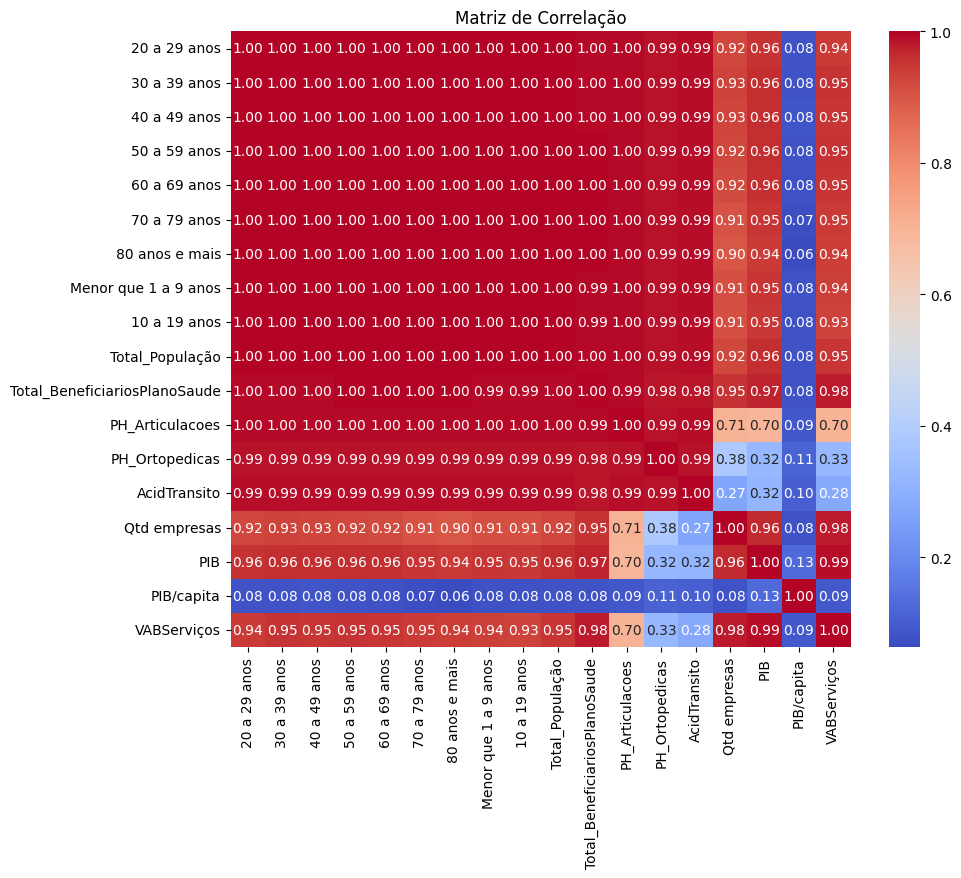

In [38]:
# Calcular matriz de correlação
correlation_matrix = df_finaldata.corr(numeric_only=True)

# Plotar matriz de correlação usando um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


### **Matriz de correlação entre variáveis selecionadas**

Para tornar a matriz de correlação mais útil, temos que escolher algumas variáveis. Iremos manter as seguintes:
* Total_População
* Total_BeneficiariosPlanoSaude
* Qtd empresas
* PH_Articulacoes
* PH_Ortopedicas
* AcidTransito
* PIB
* PIB/capita
* VABServiços

Manteremos essas variáveis pois são as que possuem maior número de dados disponíveis ou são as mais relevantes.

In [39]:
# Selecionar as colunas desejadas
df_selected = df_finaldata[["Total_População", "Total_BeneficiariosPlanoSaude", "Qtd empresas", "AcidTransito", "PIB", "PIB/capita", "VABServiços", "PH_Articulacoes", "PH_Ortopedicas"]]

# Calcular a matriz de correlação
correlation_matrix = df_selected.corr()

# Exibir a matriz de correlação
display(correlation_matrix)


Total_População  Total_BeneficiariosPlanoSaude  \
Total_População                       1.000000                       0.995828   
Total_BeneficiariosPlanoSaude         0.995828                       1.000000   
Qtd empresas                          0.924494                       0.953964   
AcidTransito                          0.991278                       0.983999   
PIB                                   0.960085                       0.974140   
PIB/capita                            0.079244                       0.078648   
VABServiços                           0.949473                       0.980260   
PH_Articulacoes                       0.995926                       0.994247   
PH_Ortopedicas                        0.986472                       0.982002   

                               Qtd empresas  AcidTransito       PIB  \
Total_População                    0.924494      0.991278  0.960085   
Total_BeneficiariosPlanoSaude      0.953964      0.983999  0.974140   
Qtd empresas                       1.000000      0.269139  0.963408   
AcidTransito                       0.269139      1.000000  0.317693   
PIB                                0.963408      0.317693  1.000000   
PIB/capita                         0.078349      0.103887  0.127973   
VABServiços                        0.981308      0.279457  0.989524   
PH_Articulacoes                    0.705320      0.990859  0.695460   
PH_Ortopedicas                     0.383686      0.985771  0.323706   

                               PIB/capita  VABServiços  PH_Articulacoes  \
Total_População                  0.079244     0.949473         0.995926   
Total_BeneficiariosPlanoSaude    0.078648     0.980260         0.994247   
Qtd empresas                     0.078349     0.981308         0.705320   
AcidTransito                     0.103887     0.279457         0.990859   
PIB                              0.127973     0.989524         0.695460   
PIB/capita                       1.000000     0.090811         0.087114   
VABServiços                      0.090811     1.000000         0.701653   
PH_Articulacoes                  0.087114     0.701653         1.000000   
PH_Ortopedicas                   0.113437     0.325341         0.988790   

                               PH_Ortopedicas  
Total_População                      0.986472  
Total_BeneficiariosPlanoSaude        0.982002  
Qtd empresas                         0.383686  
AcidTransito                         0.985771  
PIB                                  0.323706  
PIB/capita                           0.113437  
VABServiços                          0.325341  
PH_Articulacoes                      0.988790  
PH_Ortopedicas                       1.000000

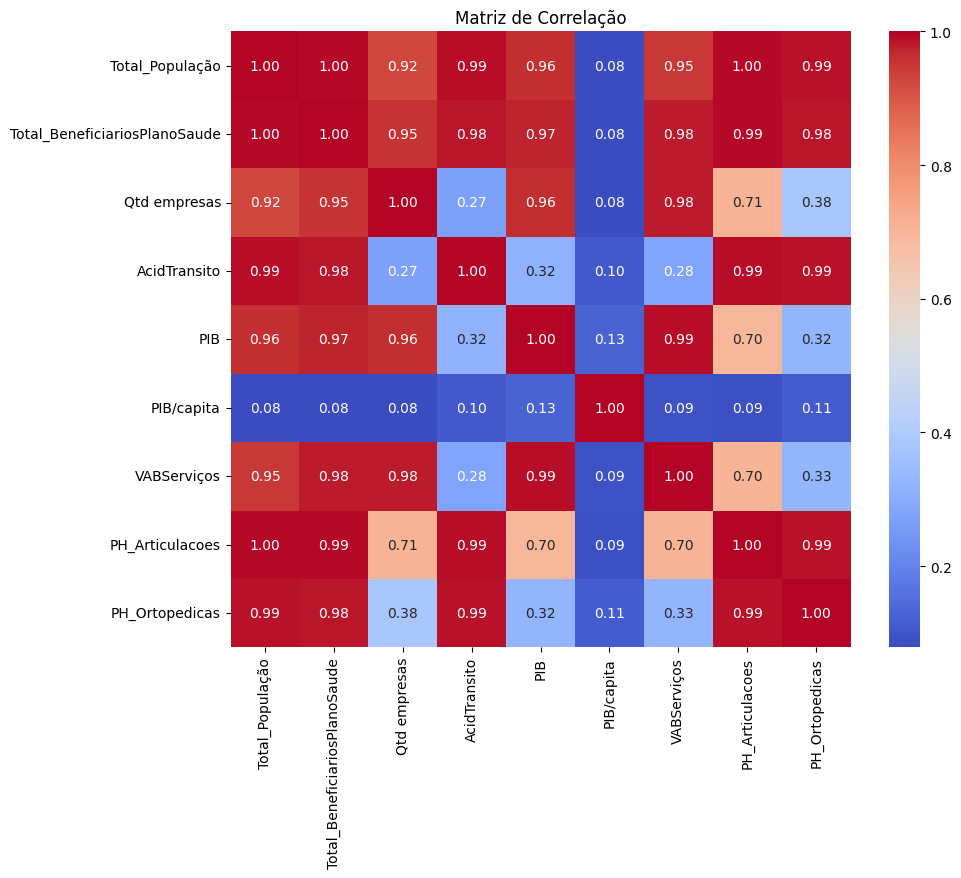

In [40]:
# Selecionar as colunas desejadas
df_selected = df_finaldata[["Total_População", "Total_BeneficiariosPlanoSaude", "Qtd empresas", "AcidTransito", "PIB", "PIB/capita", "VABServiços", "PH_Articulacoes", "PH_Ortopedicas"]]

# Calcular matriz de correlação
correlation_matrix = df_selected.corr(numeric_only=True)

# Plotar matriz de correlação usando um mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


**As variáveis que têm uma correlação positiva forte (acima de 0.9) são:**

* Total_População e Total_BeneficiariosPlanoSaude

* Total_População e AcidTransito

* Total_População e PH_Articulacoes

* Total_População e PH_Ortopedicas

* Total_BeneficiariosPlanoSaude e Qtd empresas

* Total_BeneficiariosPlanoSaude e AcidTransito

* Total_BeneficiariosPlanoSaude e PIB

* Total_BeneficiariosPlanoSaude e VABServiços

* Total_BeneficiariosPlanoSaude e PH_Articulacoes

* Total_BeneficiariosPlanoSaude e PH_Ortopedicas

* Qtd empresas e PIB

* Qtd empresas e VABServiços

* AcidTransito e PH_Articulacoes

* AcidTransito e PH_Ortopedicas

* PIB e VABServiços

* PH_Articulacoes e PH_Ortopedicas.

Isso significa que essas variáveis tendem a aumentar ou diminuir juntas na mesma proporção.

**As variáveis que têm uma correlação positiva moderada (entre 0.5 e 0.9) são:**

* Total_População e Qtd empresas

* Total_População e PIB

* Total_População e VABServiços

* Qtd empresas e PH_Articulacoes

Isso significa que essas variáveis tendem a aumentar ou diminuir juntas em uma proporção menor.

**As variáveis que têm uma correlação positiva fraca (entre 0 e 0.5) são:**

* Total_População e PIB/capita

* Total_BeneficiariosPlanoSaude e PIB/capita

* Qtd empresas e AcidTransito

* Qtd empresas e PH_Ortopedicas

* AcidTransito e PIB

* AcidTransito e PIB/capita

* AcidTransito e VABServiços

* PIB/capita e VABServiços.

Isso significa que essas variáveis têm uma relação linear muito fraca ou quase inexistente.

**As variáveis que têm uma correlação negativa fraca (entre -0.5 e 0) são:**

* PIB/capita e PH_Articulacoes

* PIB/capita e PH_Ortopedicas.

Isso significa que essas variáveis tendem a aumentar ou diminuir em direções opostas em uma proporção muito pequena.

### Testando a significância das correlações com p-values

In [131]:
from scipy.stats import pearsonr

# Criando a matrix de correlação
correlation_matrix = np.array([[1.000000, 0.995828, 0.924508, 0.991278, 0.960085, 0.079244, 0.949473, 0.995926, 0.986472],
                              [0.995828, 1.000000, 0.953970, 0.983999, 0.974140, 0.078648, 0.980260, 0.994247, 0.982002],
                              [0.924508, 0.953970, 1.000000, 0.269037, 0.963410, 0.078206, 0.981308, 0.705320, 0.383447],
                              [0.991278, 0.983999, 0.269037, 1.000000, 0.317693, 0.103887, 0.279457, 0.990859, 0.985771],
                              [0.960085, 0.974140, 0.963410, 0.317693, 1.000000, 0.127973, 0.989524, 0.695460, 0.323706],
                              [0.079244, 0.078648, 0.078206, 0.103887, 0.127973, 1.000000, 0.090811, 0.087114, 0.113437],
                              [0.949473, 0.980260, 0.981308, 0.279457, 0.989524, 0.090811, 1.000000, 0.701653, 0.325341],
                              [0.995926, 0.994247, 0.705320, 0.990859, 0.695460, 0.087114, 0.701653, 1.000000, 0.988790],
                              [0.986472, 0.982002, 0.383447, 0.985771, 0.323706, 0.113437, 0.325341, 0.988790, 1.000000]])

# Calculando p-values
p_values = np.zeros_like(correlation_matrix)
for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if i != j:
            _, p_value = pearsonr(correlation_matrix[i, :], correlation_matrix[j, :])
            p_values[i, j] = p_value

# Criando um dataframe para exibir os valores
columns = ['Total_População', 'Total_BeneficiariosPlanoSaude', 'Qtd empresas', 'AcidTransito', 'PIB', 'PIB/capita',
           'VABServiços', 'PH_Articulacoes', 'PH_Ortopedicas']
correlation_df = pd.DataFrame(correlation_matrix, columns=columns, index=columns)
p_values_df = pd.DataFrame(p_values, columns=columns, index=columns)

# Função para formatar p-values
def format_p_values(p):
    if p < 0.001:
        return "< 0.001"
    else:
        return f"{p:.3f}"

p_values_formatted = p_values_df.applymap(format_p_values)

# Exibir os valores
with pd.option_context('display.float_format', '{:.3f}'.format):
    display(p_values_formatted)


Total_População Total_BeneficiariosPlanoSaude  \
Total_População                       < 0.001                       < 0.001   
Total_BeneficiariosPlanoSaude         < 0.001                       < 0.001   
Qtd empresas                            0.079                         0.063   
AcidTransito                            0.096                         0.124   
PIB                                     0.100                         0.082   
PIB/capita                            < 0.001                       < 0.001   
VABServiços                             0.095                         0.077   
PH_Articulacoes                       < 0.001                         0.001   
PH_Ortopedicas                          0.074                         0.097   

                              Qtd empresas AcidTransito      PIB PIB/capita  \
Total_População                      0.079        0.096    0.100    < 0.001   
Total_BeneficiariosPlanoSaude        0.063        0.124    0.082    < 0.001   
Qtd empresas                       < 0.001        0.893  < 0.001      0.052   
AcidTransito                         0.893      < 0.001    0.862      0.144   
PIB                                < 0.001        0.862  < 0.001      0.070   
PIB/capita                           0.052        0.144    0.070    < 0.001   
VABServiços                        < 0.001        0.869  < 0.001      0.065   
PH_Articulacoes                      0.339        0.003    0.383      0.001   
PH_Ortopedicas                       0.969      < 0.001    0.924      0.110   

                              VABServiços PH_Articulacoes PH_Ortopedicas  
Total_População                     0.095         < 0.001          0.074  
Total_BeneficiariosPlanoSaude       0.077           0.001          0.097  
Qtd empresas                      < 0.001           0.339          0.969  
AcidTransito                        0.869           0.003        < 0.001  
PIB                               < 0.001           0.383          0.924  
PIB/capita                          0.065           0.001          0.110  
VABServiços                       < 0.001           0.372          0.936  
PH_Articulacoes                     0.372         < 0.001          0.002  
PH_Ortopedicas                      0.936           0.002        < 0.001

Os p-values pequenos ou menor que o nível de significância 0.05 indicam que o coeficiente de correlação, sendo eles:

* População x Beneficiários
* População x PIB/capita
* População x PH_Articulacoes
* PIB/capita x Beneficiários
* Qtd de empresas x PIB
* Qtd de empresas x VABServiços
* Acidentes x PH_Ortopedicas
* PIB x VABServiços


## 4.5. Outras variáveis e heatmaps

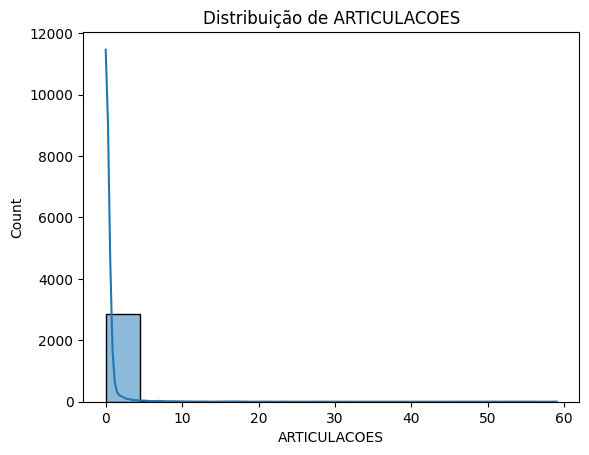

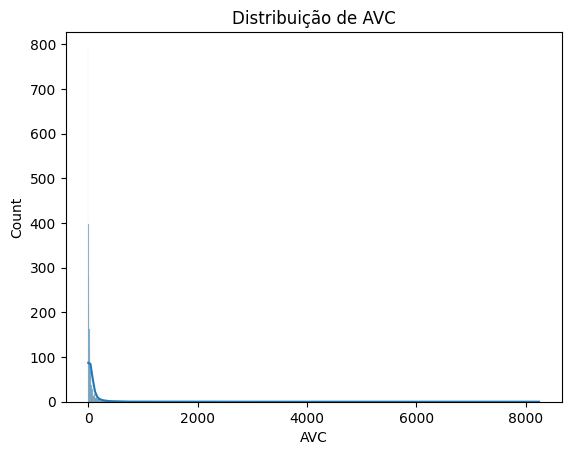

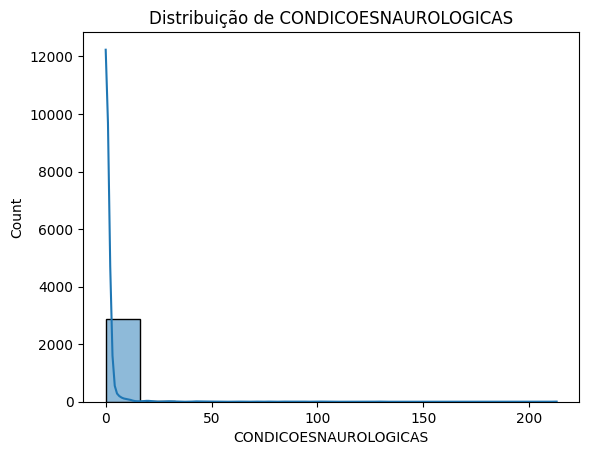

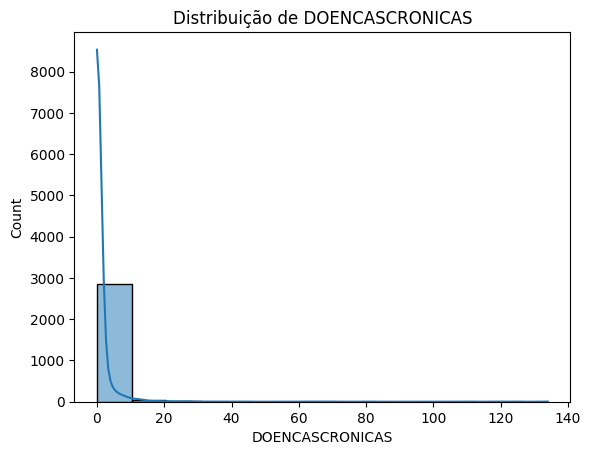

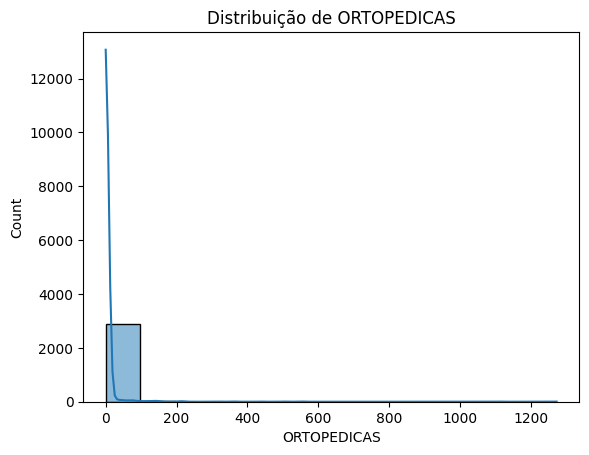

In [ ]:
# Histograma de colunas de procedimentos hospitalares
for col in df_procedimentos_hospitalares.columns:
    if df_procedimentos_hospitalares[col].dtype == 'float64':
        sns.histplot(df_procedimentos_hospitalares[col], kde=True)
        plt.title(f'Distribuição de {col}')
        plt.show()

<ipython-input-25-0b27b2c574b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_procedimentos_hospitalares.corr()


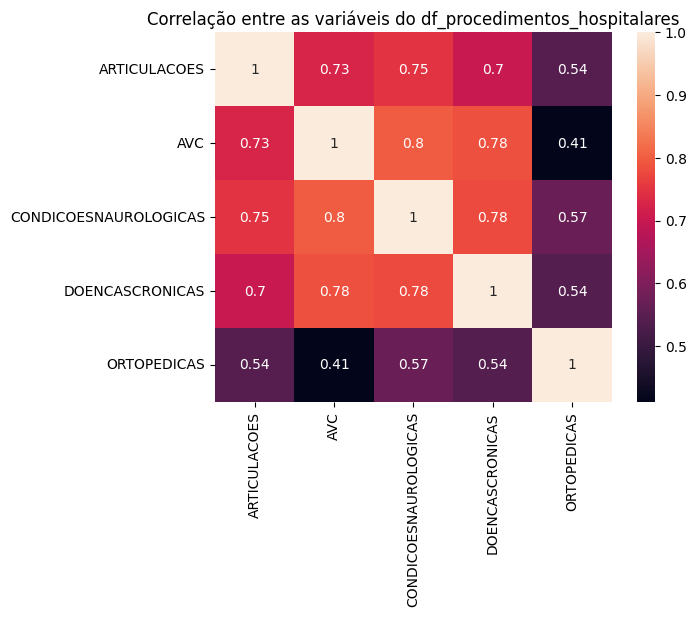

In [ ]:
# Correlação entre as colunas de procedimentos hospitalares
corr = df_procedimentos_hospitalares.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlação entre as variáveis do df_procedimentos_hospitalares')
plt.show()


In [ ]:
for df in [df_procedimentos_hospitalares, df_acidentes, df_planos, df_empresas_qtd]:
    print(df.groupby('Nome').sum().describe())


<ipython-input-26-617f16245506>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').sum().describe())
<ipython-input-26-617f16245506>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').sum().describe())
<ipython-input-26-617f16245506>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').sum().describe())


       ARTICULACOES          AVC  CONDICOESNAUROLOGICAS  DOENCASCRONICAS  \
count   2811.000000  2811.000000            2811.000000      2811.000000   
mean       0.279972    63.740306               0.922448         1.069015   
std        2.139167   261.822356               7.181557         6.099665   
min        0.000000     0.000000               0.000000         0.000000   
25%        0.000000     5.000000               0.000000         0.000000   
50%        0.000000    16.000000               0.000000         0.000000   
75%        0.000000    44.000000               0.000000         0.000000   
max       59.000000  8246.000000             213.000000       134.000000   

       ORTOPEDICAS  
count  2811.000000  
mean      4.143010  
std      41.908095  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    1272.000000  
       Acidentes de transito
count            1435.000000
mean               84.263415
std              1612.131177
min       

In [ ]:
for df in [df_procedimentos_hospitalares, df_acidentes, df_planos, df_empresas_qtd]:
    print(df.groupby('Nome').mean().describe())


       ARTICULACOES          AVC  CONDICOESNAUROLOGICAS  DOENCASCRONICAS  \
count   2811.000000  2811.000000            2811.000000      2811.000000   
mean       0.278549    62.496265               0.914799         1.054133   
std        2.138480   260.561682               7.177387         6.088994   
min        0.000000     0.000000               0.000000         0.000000   
25%        0.000000     5.000000               0.000000         0.000000   
50%        0.000000    15.000000               0.000000         0.000000   
75%        0.000000    42.000000               0.000000         0.000000   
max       59.000000  8246.000000             213.000000       134.000000   

       ORTOPEDICAS  
count  2811.000000  
mean      4.141409  
std      41.908161  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    1272.000000  
       Acidentes de transito
count            1435.000000
mean               80.094774
std              1608.084261
min       

<ipython-input-27-6f200b9907d8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').mean().describe())
<ipython-input-27-6f200b9907d8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').mean().describe())
<ipython-input-27-6f200b9907d8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Nome').mean().describe())


In [ ]:
from google.colab import files

# Loop para calcular a média por município e obter a descrição
dataframes = [df_procedimentos_hospitalares, df_acidentes, df_planos, df_empresas_qtd]
dfs_mean_describe = []

for df in dataframes:
    mean_describe = df.groupby('Nome').mean().describe()
    dfs_mean_describe.append(mean_describe)

# Concatenar os dataframes em uma única tabela
result = pd.concat(dfs_mean_describe, axis=0)

# Salvar os dados em um arquivo Excel
result.to_excel('resultados.xlsx', index=True)

# Fazer o download do arquivo Excel
files.download('resultados.xlsx')


<ipython-input-28-684a7a81b441>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_describe = df.groupby('Nome').mean().describe()
<ipython-input-28-684a7a81b441>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_describe = df.groupby('Nome').mean().describe()
<ipython-input-28-684a7a81b441>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_describe = df.groupby('Nome').mean().describe()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# URL do arquivo .shp
url = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2021/Brasil/BR/BR_Municipios_2021.zip"

In [ ]:
# Fazendo download do arquivo
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))

# Extraindo o arquivo
z.extractall(path="/content/")  # ou qualquer outro caminho onde você deseja colocar o arquivo

# Carregando o arquivo de formato geoespacial com as geometrias dos municípios
brasil = gpd.read_file('/content/BR_Municipios_2021.shp')

In [ ]:
# Se 'NM_MUN' estiver no DataFrame e for do tipo 'object' (string), faça o ajuste
if 'NM_MUN' in brasil.columns and brasil['NM_MUN'].dtype == 'object':
    brasil['NM_MUN'] = brasil['NM_MUN'].apply(lambda x: unidecode.unidecode(x).lower())
    print(f"Coluna 'NM_MUN' ajustada.")
else:
    print("Coluna 'NM_MUN' não encontrada ou o tipo de dado não é 'string'.")

AttributeError: ignored

In [ ]:
print(brasil.columns)

Index(['CD_MUN', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'geometry'], dtype='object')


In [ ]:
# Convertendo a coluna 'NM_MUN' para minúsculo
brasil['NM_MUN'] = brasil['NM_MUN'].str.lower()

# Mudando o índice do dataframe 'df_empresas_qtd' para 'Nome'
df_empresas_qtd_indexed = df_empresas_qtd.set_index('Nome')

# Unindo o dataframe geoespacial com os dados de quantidade de empresas
mapa = brasil.merge(df_empresas_qtd_indexed, how='left', left_on='NM_MUN', right_index=True)

# Substituindo os valores NaN por 0
mapa['Qtd empresas'] = mapa['Qtd empresas'].fillna(0)

# Removendo a coluna 'Codigo'
mapa = mapa.drop(columns=['Codigo'])



In [ ]:
print(mapa.isnull().sum())


CD_MUN          0
NM_MUN          0
SIGLA           0
AREA_KM2        0
geometry        0
Qtd empresas    0
dtype: int64


In [ ]:
# Salvar os dados da coluna 'NM_MUN' em um novo DataFrame
df_nm_mun = brasil[['NM_MUN']]

# Escrever o DataFrame para um arquivo CSV
df_nm_mun.to_csv('nm_mun.csv', index=False)

# Baixar o arquivo CSV para o seu computador
from google.colab import files
files.download('nm_mun.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

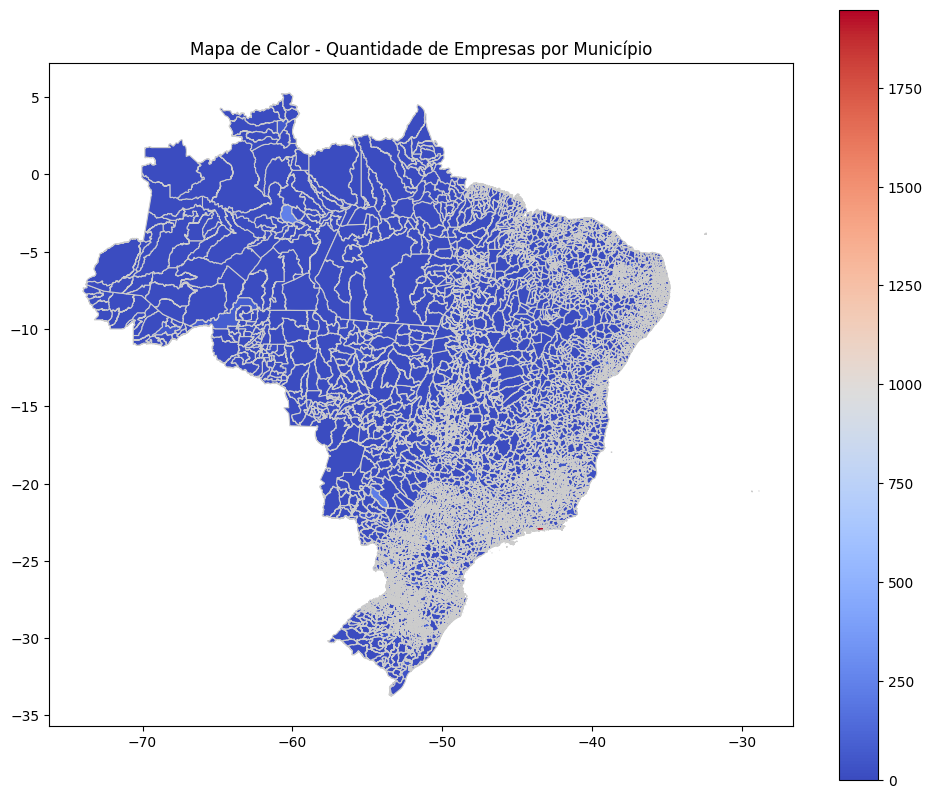

In [ ]:
# Plotando o mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mapa.plot(column='Qtd empresas', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Mapa de Calor - Quantidade de Empresas por Município')
plt.show()

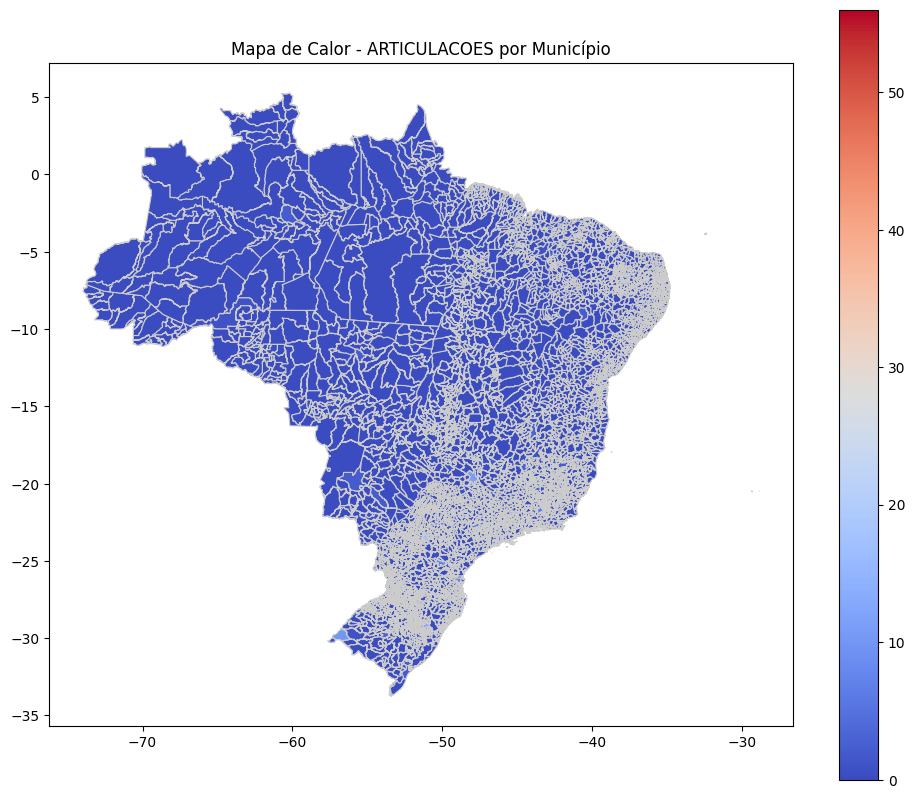

In [ ]:
def plot_heatmap(df, geo_df, procedure):
    # Verificando se o procedimento existe nas colunas do dataframe
    if procedure not in df.columns:
        print(f'O procedimento {procedure} não foi encontrado.')
        return

    # Mudando o índice do dataframe para 'Nome'
    df_indexed = df.set_index('Nome')

    # Unindo o dataframe geoespacial com os dados de procedimentos hospitalares
    mapa = geo_df.merge(df_indexed, how='left', left_on='NM_MUN', right_index=True)

    # Substituindo os valores NaN por 0
    mapa[procedure] = mapa[procedure].fillna(0)

    # Plotando o mapa de calor
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    mapa.plot(column=procedure, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.title(f'Mapa de Calor - {procedure} por Município')
    plt.show()

# Agora você pode chamar a função para cada tipo de procedimento que quiser visualizar:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'ARTICULACOES')



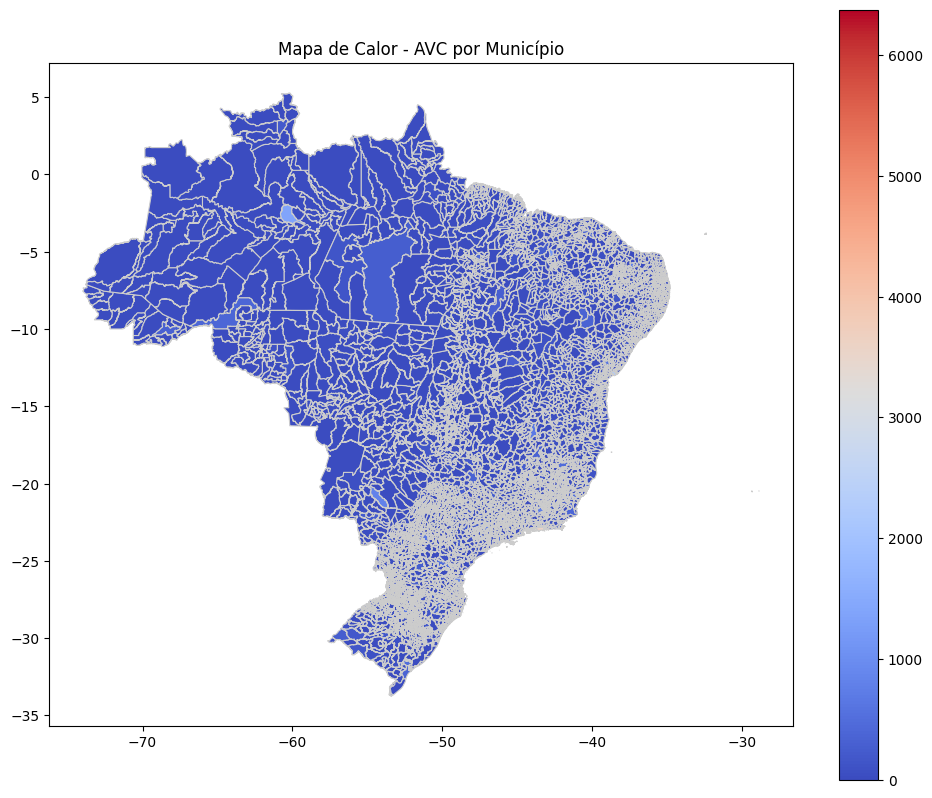

In [ ]:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'AVC')


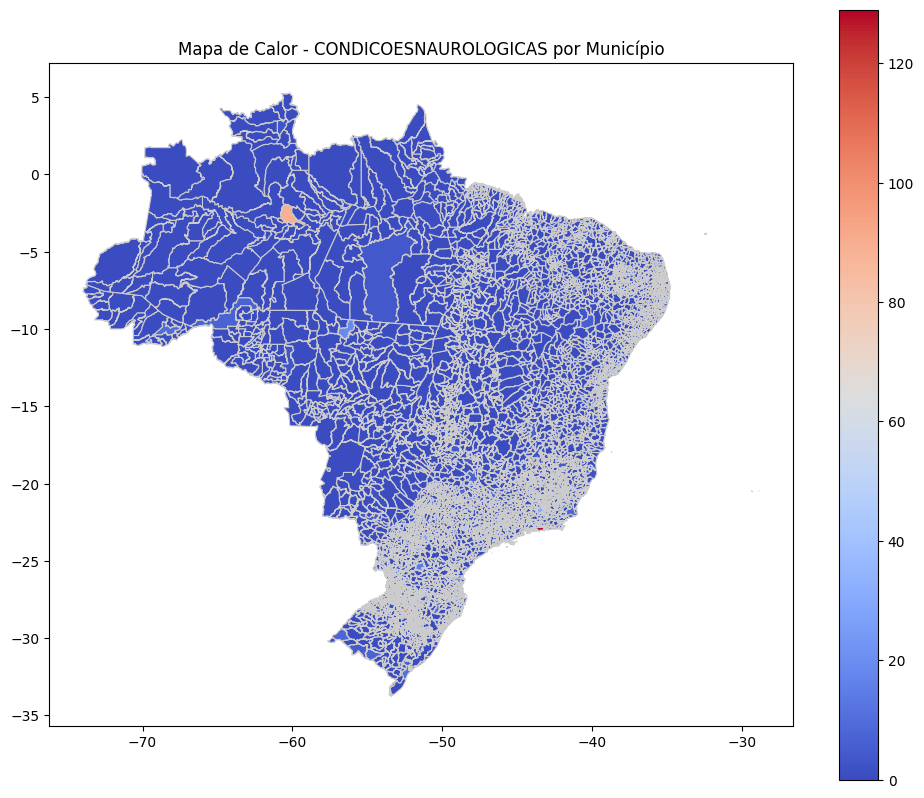

In [ ]:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'CONDICOESNAUROLOGICAS')


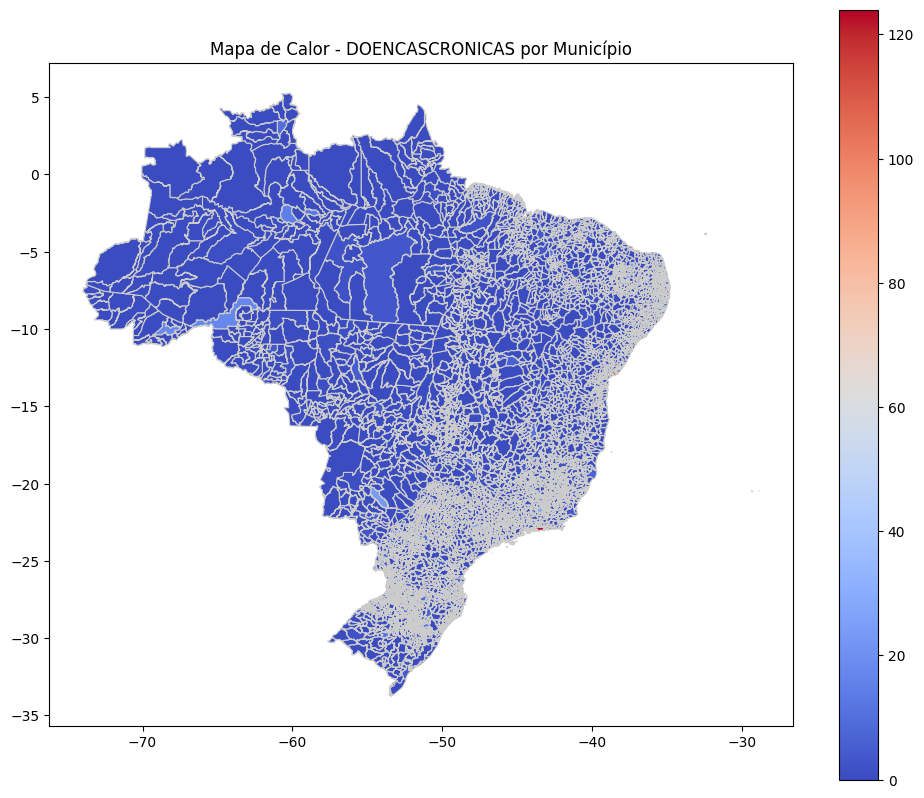

In [ ]:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'DOENCASCRONICAS')


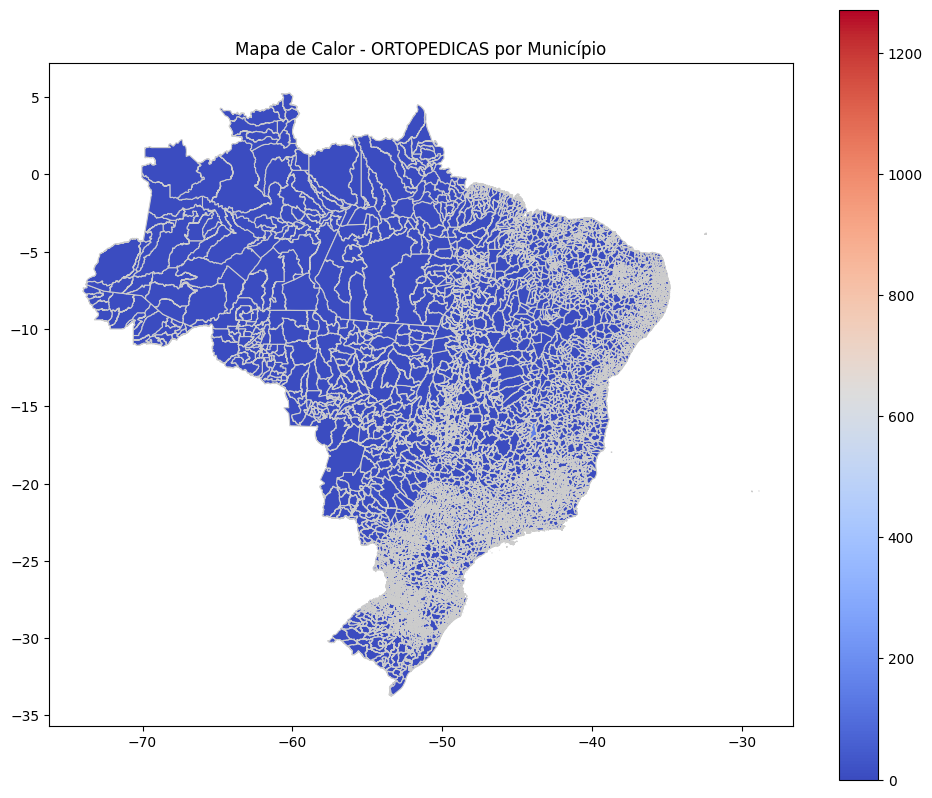

In [ ]:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'ORTOPEDICAS')

<ipython-input-43-835d3dd1d017>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  municipios_soma = df_procedimentos_hospitalares.groupby('Nome').sum()


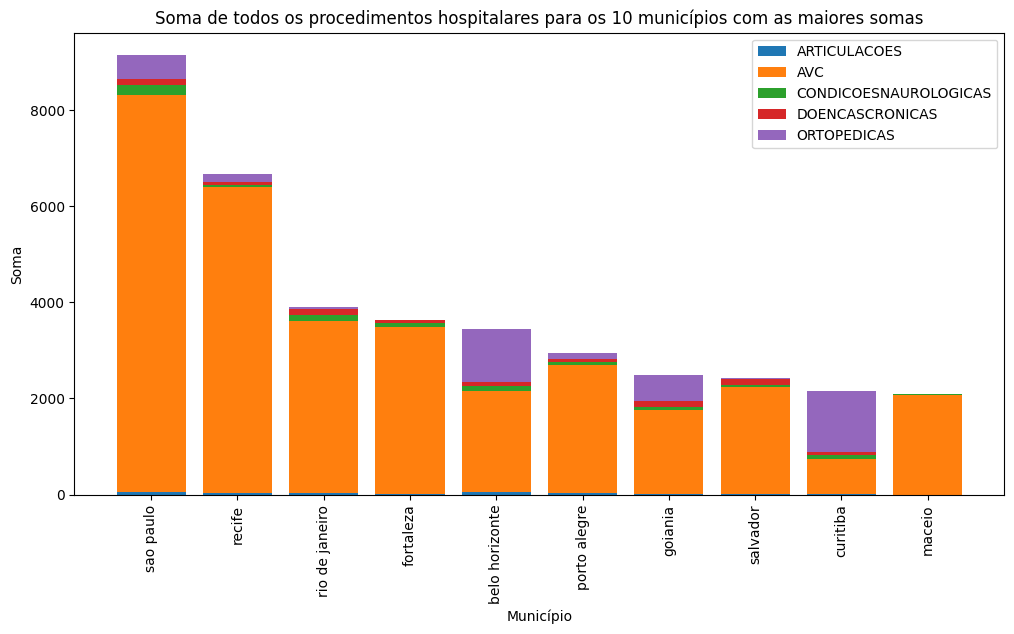

In [ ]:
# Calcular a soma por município
municipios_soma = df_procedimentos_hospitalares.groupby('Nome').sum()

# Seleciona os 10 municípios com as maiores somas
top_10_municipios = municipios_soma.sum(axis=1).nlargest(10).index
df_top_10 = municipios_soma.loc[top_10_municipios]

# Cria um novo gráfico
fig, ax = plt.subplots(figsize=(12,6))

# Adicionar barras para cada coluna
bottom = np.zeros(len(df_top_10))
for col in df_top_10.columns:
    ax.bar(df_top_10.index, df_top_10[col], bottom=bottom, label=col)
    bottom += np.array(df_top_10[col])

# Adicionar legendas e título
ax.set_xlabel('Município')
ax.set_ylabel('Soma')
ax.set_title('Soma de todos os procedimentos hospitalares para os 10 municípios com as maiores somas')
ax.legend()

# Rotacionar os nomes dos municípios para melhor visualização
plt.xticks(rotation=90)
plt.show()


Dropdown(description='Procedimento:', options=('ARTICULACOES', 'AVC', 'CONDICOESNAUROLOGICAS', 'DOENCASCRONICA…

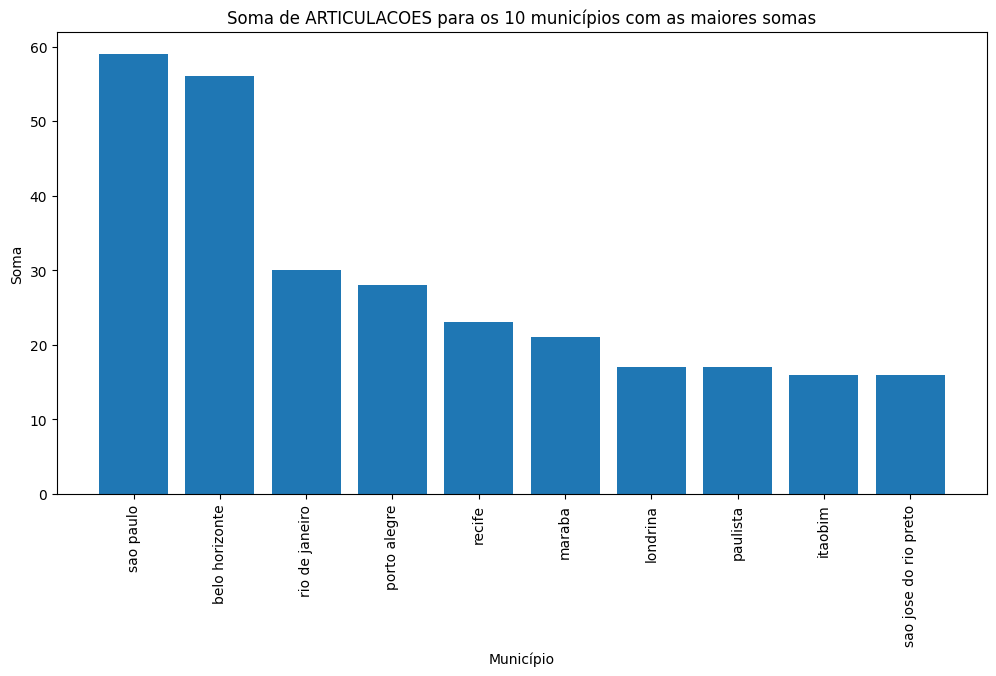

In [ ]:
# Criando um widget Dropdown para selecionar o tipo de procedimento hospitalar
procedimentos_dropdown = widgets.Dropdown(
    options=df_procedimentos_hospitalares.columns[2:],  # Ignorando as colunas 'Nome' e 'Codigo'
    value=df_procedimentos_hospitalares.columns[2],  # Valor inicial
    description='Procedimento:',
)

def update_grafico(procedimento):
    # Calcula a soma por município para o procedimento selecionado
    municipios_soma = df_procedimentos_hospitalares.groupby('Nome')[procedimento].sum()

    # Seleciona os 10 municípios com as maiores somas
    top_10_municipios = municipios_soma.nlargest(10).index

    # Cria um novo gráfico
    plt.figure(figsize=(12, 6))

    # Plotando as barras
    plt.bar(top_10_municipios, municipios_soma.loc[top_10_municipios])

    # Adicionando legendas e título
    plt.xlabel('Município')
    plt.ylabel('Soma')
    plt.title(f'Soma de {procedimento} para os 10 municípios com as maiores somas')

    # Rotacionar os nomes dos municípios para melhor visualização
    plt.xticks(rotation=90)
    plt.show()

# Função que será chamada quando o valor do widget dropdown mudar
def dropdown_eventhandler(change):
    update_grafico(change.new)

# Associa o manipulador de eventos ao widget
procedimentos_dropdown.observe(dropdown_eventhandler, names='value')

# Exibindo o widget
display(procedimentos_dropdown)

# Exibindo o gráfico inicial
update_grafico(procedimentos_dropdown.value)


In [ ]:
# DataFrame: df_procedimentos_hospitalares
print(df_procedimentos_hospitalares.describe())

# DataFrame: df_populacao
print(df_populacao.describe())

# DataFrame: df_acidentes
print(df_acidentes.describe())

# DataFrame: df_planos
print(df_planos.describe())

# DataFrame: df_planos
print(df_empresas_qtd.describe())


       ARTICULACOES          AVC  CONDICOESNAUROLOGICAS  DOENCASCRONICAS  \
count   2900.000000  2900.000000            2900.000000      2900.000000   
mean       0.271379    61.784138               0.894138         1.036207   
std        2.106628   257.797942               7.071178         6.007044   
min        0.000000     0.000000               0.000000         0.000000   
25%        0.000000     5.000000               0.000000         0.000000   
50%        0.000000    15.000000               0.000000         0.000000   
75%        0.000000    41.000000               0.000000         0.000000   
max       59.000000  8246.000000             213.000000       134.000000   

       ORTOPEDICAS  
count  2900.000000  
mean      4.015862  
std      41.265976  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max    1272.000000  
       20 a 29 anos  30 a 39 anos  40 a 49 anos  50 a 59 anos  60 a 69 anos  \
count  5.566000e+03  5.566000e+03  5.566000e+03

*   O valor ausente em 'Nome' e 'Estado' é a última linha, que apenas soma o total de cada coluna numérica.
* Os outros valores ausentes são devido ao fato de que os dados coletados não foram encontrados para cada município brasileiro.

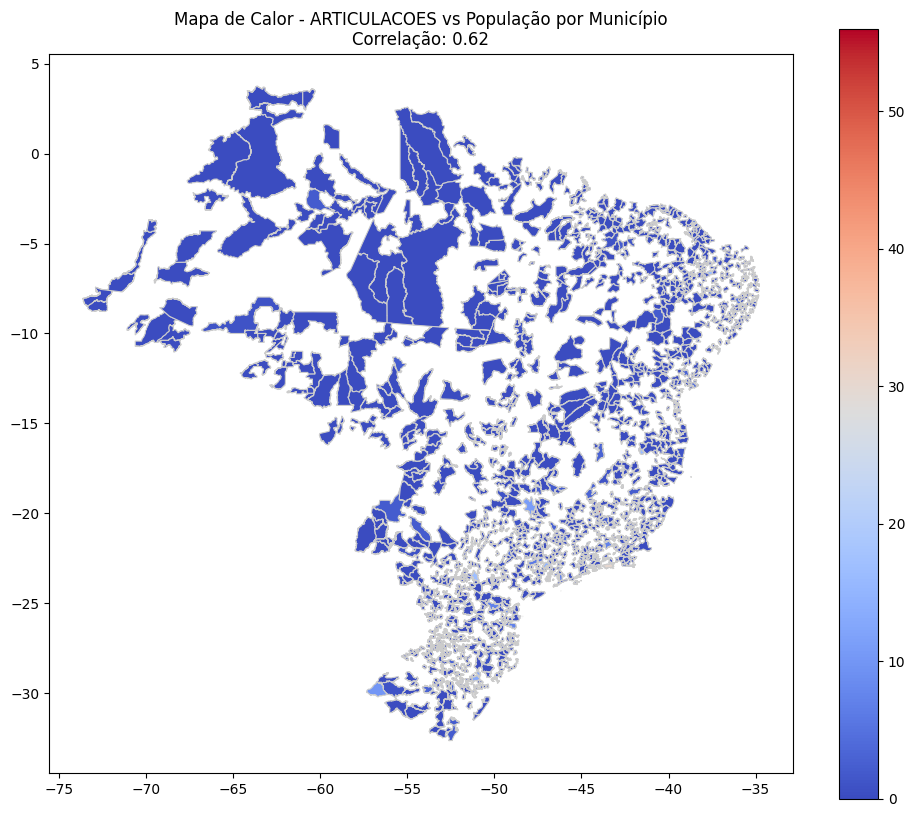

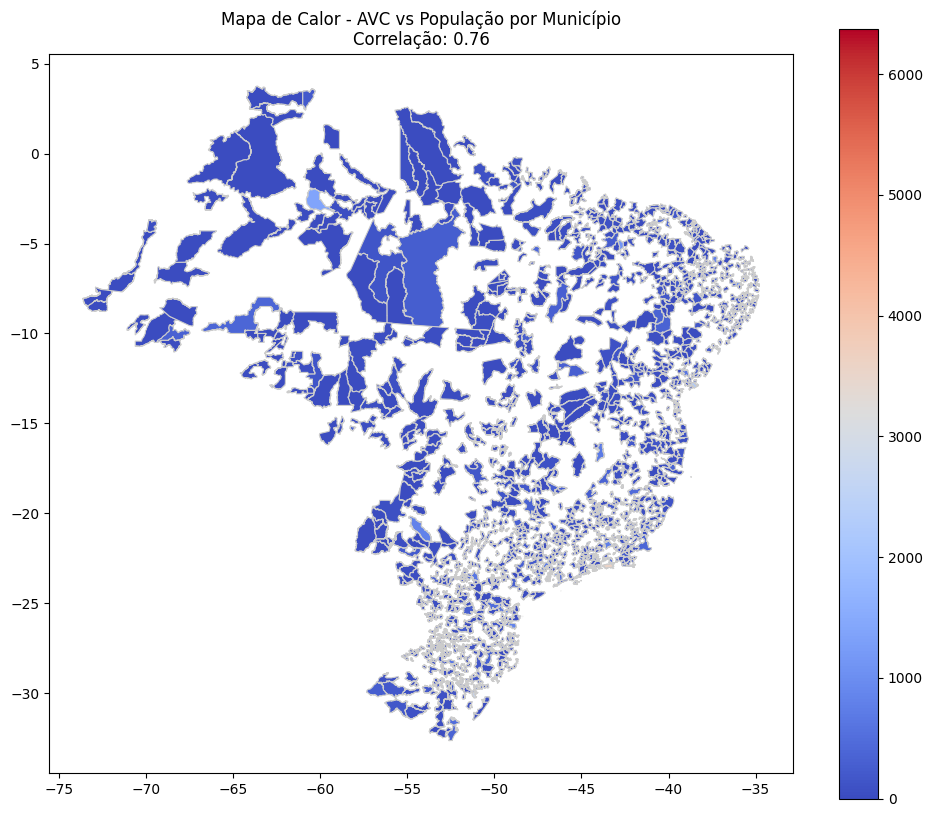

In [ ]:
def plot_heatmap(df, geo_df, procedure, population_df):
    # Verificando se o procedimento existe nas colunas do dataframe
    if procedure not in df.columns:
        print(f'O procedimento {procedure} não foi encontrado.')
        return

    # Mudando o índice do dataframe para 'Nome'
    df_indexed = df.set_index('Nome')

    # Unindo o dataframe geoespacial com os dados de procedimentos hospitalares
    mapa = geo_df.merge(df_indexed, how='left', left_on='NM_MUN', right_index=True)

    # Unindo os dados de população com o dataframe mapa
    mapa = mapa.merge(population_df, how='left', left_on='NM_MUN', right_on='Nome')

    # Removendo os valores NaN
    mapa = mapa.dropna(subset=[procedure, 'populacao_total'])

    # Calculando a correlação entre o procedimento e a população
    correlation = np.corrcoef(mapa[procedure], mapa['populacao_total'])[0, 1]

    # Plotando o mapa de calor
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    mapa.plot(column=procedure, cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    plt.title(f'Mapa de Calor - {procedure} vs População por Município\nCorrelação: {correlation:.2f}')
    plt.show()

# Agora você pode chamar a função para visualizar o mapa de calor com a correlação:
plot_heatmap(df_procedimentos_hospitalares, brasil, 'ARTICULACOES', df_populacao)
plot_heatmap(df_procedimentos_hospitalares, brasil, 'AVC', df_populacao)



## 5. Insights para as próximas etapas

* Podemos fazer mais testes para analisar a significância das correlações.

* Podemos adicionar mais variáveis, como gastos com saúde.

* Podemos usar as variáveis que têm uma correlação positiva forte com PH_Ortopedicas, que são Total_População, Total_BeneficiariosPlanoSaude, AcidTransito e PH_Articulacoes, para identificar as cidades ou regiões que têm uma alta demanda por serviços de ortopedia e reabilitação. Essas variáveis podem indicar o tamanho do mercado potencial, o poder aquisitivo dos clientes, a incidência de acidentes de trânsito e a prevalência de problemas articulares na população.


* Podemos usar as variáveis que têm uma correlação negativa fraca com PH_Ortopedicas, que são PIB/capita, para identificar as oportunidades de crescimento e de diferenciação do o negócio. Essa variável pode sugerir que há um espaço para melhorar a oferta de serviços de ortopedia e reabilitação em locais com maior renda per capita, onde os clientes podem estar dispostos a pagar mais por um atendimento mais especializado e personalizado.